<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/rbnlp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Объединяет actions_1 и actions_2 в общий корпус текста.
Извлекает униграммы, биграммы и триграммы.
Сопоставляет их с оценками из results_1 и results_2.
Находит наиболее часто встречаемые и наиболее высоко оцениваемые n-граммы.
Строит граф наиболее частых связей с весами на рёбрах, отражающими силу связи (например, среднюю оценку или частоту).

# подготовка

In [ ]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib
#import matplotlib.pyplot as plt

In [ ]:
df_act= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/db25.xlsx', sheet_name= 1)
df_act.head(3)

,fighter1,fighter2,stage,start_ep,end_ep,attacker,actions_1,actions_2,results_1,results_2
0,ilkvl0198,karma0692,четвертьфинал,04:47:00,04:48:00,1,алнбк,алрпг,1,0
1,ilkvl0198,karma0692,четвертьфинал,04:31:00,04:30:00,2,бл,апрпк,0,0
2,ilkvl0198,karma0692,четвертьфинал,04:28:00,04:26:00,2,апрбг,"апрпг, апрпг, алрпг",1,"1,0,0"


# Подготовка данных

In [ ]:
df_act['results_1'] = df_act['results_1'].astype(str)
df_act['sum_1'] = df_act['results_1'].apply(
    lambda x: sum(float(i) for i in x.split(',') if i.strip().isdigit()) if pd.notna(x) else 0
)

In [ ]:
df_act['results_2'] = df_act['results_2'].astype(str)
df_act['sum_2'] = df_act['results_2'].apply(
    lambda x: sum(float(i) for i in x.split(',') if i.strip().isdigit()) if pd.notna(x) else 0
)

In [ ]:
df_act.columns

Index(['fighter1', 'fighter2', 'stage', 'start_ep', 'end_ep', 'attacker',
       'actions_1', 'actions_2', 'results_1', 'results_2', 'sum_1', 'sum_2'],
      dtype='object')

In [ ]:
df_act['sum_1'].unique()

array([1., 0., 6., 4., 2., 9., 3., 5., 7.])

In [ ]:
df_act['results_1'].unique()

array(['1', '0', '0.2', '0,0', '0,1', '0,0,1', '0,0.2', '1,0', '0,0,0',
       '0,0,1,0,0.2', '0,0,1,0,0', '0,1, 5', '1,1,2', '0,2', '2,1,1',
       '1,0,1,2,5', '1,2', '5', '0,1,2', '0,1,0,0', '1,1', '0,1,1',
       '1,0,0,0,1', '0,0,1,0', '1,1,0,1', '0,0,0,0', '0,0,', '1,0,0,0',
       'nan', '2.2', '1,5', '1,0,0', '2', '0, 1, 0.2', '2, 5', '0,2,0',
       '1.2', '0,1,5', '2,5', '1,0,1', '1,1,0'], dtype=object)

# граммы

In [ ]:
 #!pip install nltk  # раскомментировать, если нужно

In [ ]:
df = df_act.copy()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


===  Топ-10 униграмм ===
ппб: 107
апрпг: 95
бл: 81
алрпг: 69
апнбк: 49
апрбг: 48
алнбк: 45
алрбг: 43
зон: 41
апнпк: 37
===  Топ-10 биграмм ===
алрпг: 17
апрпг: 16
ппб: 15
зот: 13
апрпг: 12
апрпг: 12
ппб: 10
бл: 10
бл: 9
ппб: 9
===  Топ-10 триграмм ===
апрпг: 6
алрпг: 6
ппб: 4
апрпг: 3
ппб: 3
ппб: 3
апрбг: 3
алрпг: 3
алрбг: 3
ппб: 3

=== Высоко оценённые: Топ-10 биграмм ===
ппб ппуд: 4
апрбг ппб: 3
алрпг апрпг: 3
апрпг ппб: 2
ппуд ппудпр: 2
алрпг алрпг: 2
ппб апрпг: 1
ппб бл: 1
бл кабр: 1
кабр ппуд: 1

=== Высоко оценённые: Топ-10 триграмм ===
ппб ппуд ппудпр: 2
апрпг ппб апрпг: 1
ппб апрпг ппб: 1
апрпг ппб бл: 1
ппб бл кабр: 1
бл кабр ппуд: 1
кабр ппуд апрпк: 1
ппуд апрпк ппб: 1
апрпк ппб ппуд: 1
ппб ппуд апрбг: 1


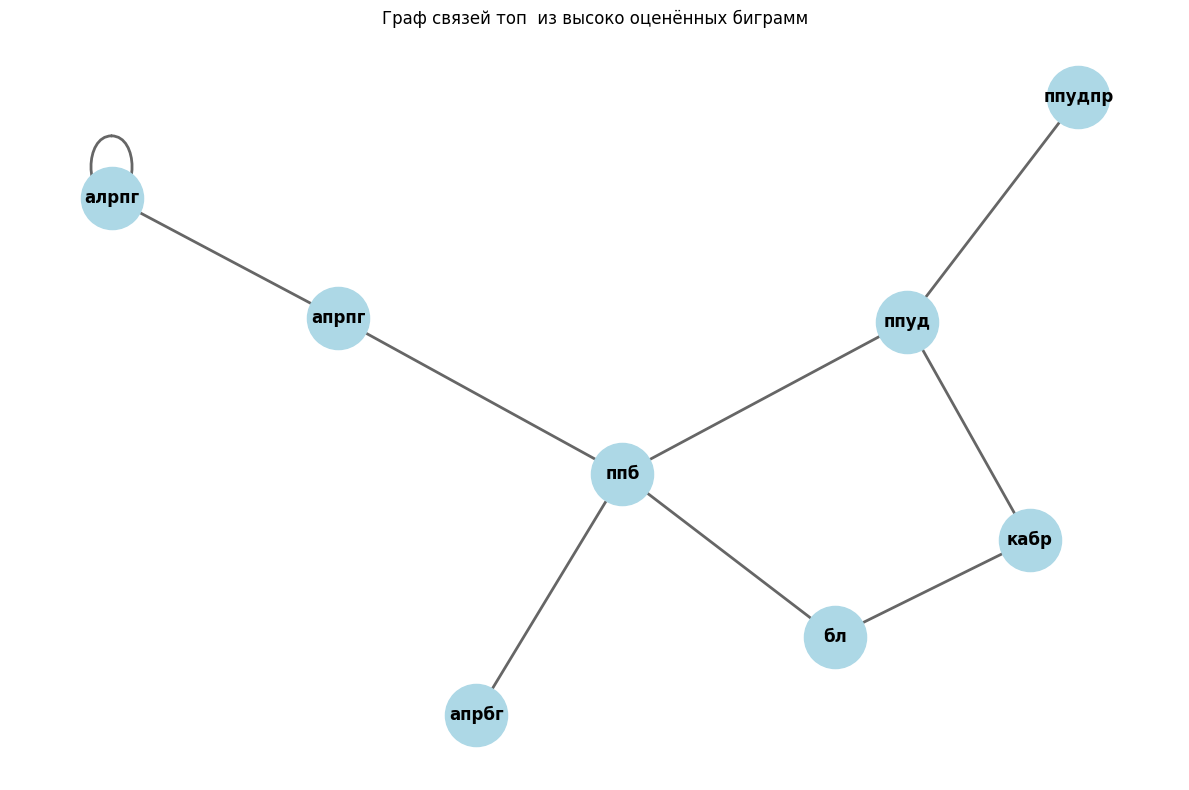

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import string
import matplotlib.pyplot as plt
import networkx as nx

# Загрузка ресурсов NLTK (выполняется один раз)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Предположим, что df уже загружен
# Пример: df = pd.read_csv('your_data.csv')

# Объединяем реплики и их оценки
all_texts = []
high_score_texts = []

# Порог для "высоко оценённых" — например, оценка >= 2
THRESHOLD = 2

for _, row in df.iterrows():
    text1 = str(row['actions_1'])
    text2 = str(row['actions_2'])
    score1 = row['sum_1']
    score2 = row['sum_2']

    all_texts.append(text1)
    all_texts.append(text2)

    if score1 >= THRESHOLD:
        high_score_texts.append(text1)
    if score2 >= THRESHOLD:
        high_score_texts.append(text2)

# Функция предобработки текста
def preprocess(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление знаков препинания
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Токенизация
    tokens = word_tokenize(text, language='russian')
    # Удаление стоп-слов (опционально)
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return tokens

# Обработка всех текстов
all_tokens = []
for text in all_texts:
    all_tokens.extend(preprocess(text))

# Обработка высоко оценённых текстов
high_tokens = []
for text in high_score_texts:
    high_tokens.extend(preprocess(text))

# Функция для получения n-грамм и их частот
def get_ngram_freq(tokens, n, top_k=10):
    n_grams = list(ngrams(tokens, n))
    return Counter(n_grams).most_common(top_k)

# Получаем частоты
unigrams_all = get_ngram_freq(all_tokens, 1, 10)
bigrams_all = get_ngram_freq(all_tokens, 2, 10)
trigrams_all = get_ngram_freq(all_tokens, 3, 10)

unigrams_high = get_ngram_freq(high_tokens, 1, 10)
bigrams_high = get_ngram_freq(high_tokens, 2, 10)
trigrams_high = get_ngram_freq(high_tokens, 3, 10)

# Вывод результатов
print("===  Топ-10 униграмм ===")
for gram, freq in unigrams_all:
    print(f"{gram[0]}: {freq}")

print("===  Топ-10 биграмм ===")
for gram, freq in bigrams_all:
    print(f"{gram[0]}: {freq}")

print("===  Топ-10 триграмм ===")
for gram, freq in trigrams_all:
    print(f"{gram[0]}: {freq}")



print("\n=== Высоко оценённые: Топ-10 биграмм ===")
for gram, freq in bigrams_high:
    print(f"{' '.join(gram)}: {freq}")

print("\n=== Высоко оценённые: Топ-10 триграмм ===")
for gram, freq in trigrams_high:
    print(f"{' '.join(gram)}: {freq}")


# --- Построение графа связей для топ-биграмм из высоко оценённых реплик ---
top_bigrams = [gram for gram, _ in bigrams_high]

G = nx.Graph()

for w1, w2 in top_bigrams:
    G.add_edge(w1, w2)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
plt.title("Граф связей топ  из высоко оценённых биграмм")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
trigrams_all

[(('апрпг', 'алрпг', 'апрпг'), 6),
 (('алрпг', 'апрпг', 'алрпг'), 6),
 (('ппб', 'зот', 'ппб'), 4),
 (('апрпг', 'алрпг', 'ппб'), 3),
 (('ппб', 'зот', 'апнпк'), 3),
 (('ппб', 'бл', 'алнбк'), 3),
 (('апрбг', 'алрбг', 'бл'), 3),
 (('алрпг', 'апрпг', 'апнбк'), 3),
 (('алрбг', 'апрбг', 'алрбг'), 3),
 (('ппб', 'алрпг', 'апрпг'), 3)]

# оценки

In [ ]:
#!pip install plotly networkx matplotlib nltk -q
import pandas as pd
import numpy as np
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('russian'))

 особенности:

Нет оценок → заменяем на 0.
Если оценок меньше, чем слов в тексте → заполняем недостающие нулями.
Если оценок больше, чем слов → обрезаем по количеству слов.
Текст может содержать нестандартные токены вроде "апрпг" — оставляем их как есть (не фильтруем по длине/языку).
Каждое слово в высказывании сопоставляется со своей оценкой — а не со средней по всей реплике.
Это важно: ранее мы усредняли оценку по всей реплике для всех n-грамм. Теперь будем использовать позиционное сопоставление:

actions = "a,b,c" → токены: ["a", "b", "c"]
results = "0,1,0" → оценки: [0, 1, 0]
Тогда слово "b" получает оценку 1, а "a" и "c" — 0.
Такой подход точнее отражает локальную оценку каждого токена.

# Функция обработки одной колонки

In [ ]:
def align_texts_and_scores(text_col, score_col):
    """
    Принимает pd.Series с текстами и оценками.
    Возвращает список списков токенов и оценок той же длины.
    """
    tokens_list = []
    scores_list = []

    for text, scores_str in zip(text_col, score_col):
        # Обработка текста
        if pd.isna(text) or str(text).strip() == "":
            tokens = []
        else:
            tokens = [t.strip() for t in str(text).split(',') if t.strip() != ""]

        # Обработка оценок
        if pd.isna(scores_str) or str(scores_str).strip() == "":
            score_vals = []
        else:
            try:
                score_vals = [float(x.strip()) for x in str(scores_str).split(',') if x.strip() != ""]
            except ValueError:
                score_vals = [0.0] * len(tokens)

        # Выравнивание длины
        n = len(tokens)
        if len(score_vals) < n:
            score_vals += [0.0] * (n - len(score_vals))
        elif len(score_vals) > n:
            score_vals = score_vals[:n]
        else:
            pass  # равны

        tokens_list.append(tokens)
        scores_list.append(score_vals)
    return tokens_list, scores_list

# Объединение данных обоих

In [ ]:
tokens1, scores1 = align_texts_and_scores(df['actions_1'], df['results_1'])
tokens2, scores2 = align_texts_and_scores(df['actions_2'], df['results_2'])

all_tokens = tokens1 + tokens2
all_scores = scores1 + scores2

# Сбор n-грамм с привязкой к оценкам
Теперь каждая n-грамма получает оценку как среднее от оценок её токенов.

In [ ]:
all_ngram_scores = []

for tokens, scores in zip(all_tokens, all_scores):
    if not tokens:
        continue

    # Генерация n-грамм
    unigrams = [(tokens[i], scores[i]) for i in range(len(tokens))]
    bigrams = [( (tokens[i], tokens[i+1]), (scores[i] + scores[i+1]) / 2 )
               for i in range(len(tokens) - 1)]
    trigrams = [( (tokens[i], tokens[i+1], tokens[i+2]),
                  (scores[i] + scores[i+1] + scores[i+2]) / 3 )
                for i in range(len(tokens) - 2)]

    # Преобразуем в строки
    for gram, score in unigrams:
        all_ngram_scores.append((gram, score))
    for gram, score in bigrams:
        all_ngram_scores.append((' '.join(gram), score))
    for gram, score in trigrams:
        all_ngram_scores.append((' '.join(gram), score))

# Частота и средние оценки

In [ ]:
# Частота
ngram_freq = Counter([ngram for ngram, score in all_ngram_scores])

# Агрегация оценок
from collections import defaultdict
score_dict = defaultdict(list)
for ngram, score in all_ngram_scores:
    score_dict[ngram].append(score)

ngram_avg_score = {ngram: np.mean(scores) for ngram, scores in score_dict.items()}

# Топы

In [ ]:
top_freq = ngram_freq.most_common(10)
top_scored = sorted(ngram_avg_score.items(), key=lambda x: x[1], reverse=True)[:10]

print("Наиболее частые n-граммы:")
for gram, freq in top_freq:
    print(f"  '{gram}': {freq}")

print("\nНаиболее высоко оцениваемые n-граммы:")
for gram, avg in top_scored:
    print(f"  '{gram}': {avg:.2f}")

Наиболее частые n-граммы:
  'апрпг': 124
  'ппб': 120
  'бл': 99
  'алрпг': 90
  '-': 85
  'алнбк': 64
  'апнбк': 58
  'алрбг': 55
  'апрбг': 53
  'зон': 44

Наиболее высоко оцениваемые n-граммы:
  'ппблпр': 5.00
  'кабр ппуд': 3.00
  'ппб ппуд ппудпр': 2.67
  'апнпк': 0.53
  '-': nan
  'алнпг': 5.00
  'ппуд ппблпр': 3.50
  'апрпг алнпг': 3.00
  'бл кабр ппуд': 2.00
  'апрпг апрпг алнпг': 2.00


# Граф связей (только для биграмм и триграмм)

Код масштабируем и работает даже при пустых/некорректных данных.
Оценки не усредняются по реплике, а привязаны к конкретным словам.
Граф строится только по реальным связям между словами, с учётом частоты и оценки.

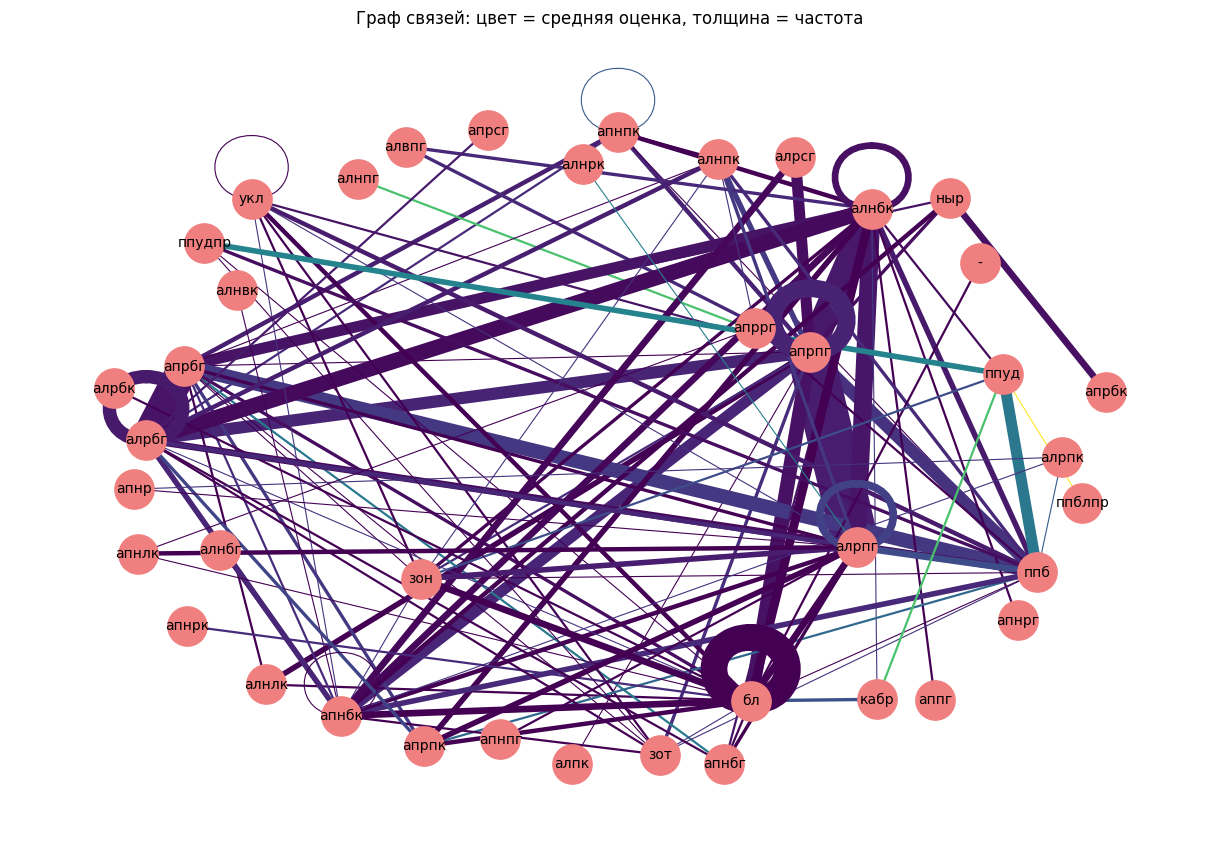

In [ ]:
G = nx.Graph()

for ngram, score in all_ngram_scores:
    words = ngram.split()
    if len(words) >= 2:
        for i in range(len(words) - 1):
            u, v = words[i], words[i+1]
            if G.has_edge(u, v):
                # Средневзвешенное обновление
                old_weight = G[u][v]['weight']
                old_count = G[u][v]['count']
                new_count = old_count + 1
                new_weight = (old_weight * old_count + score) / new_count
                G[u][v]['weight'] = new_weight
                G[u][v]['count'] = new_count
            else:
                G.add_edge(u, v, weight=score, count=1)

# Удаление изолятов
G.remove_nodes_from(list(nx.isolates(G)))

if len(G.nodes) > 0:
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2, seed=42)

    edges = G.edges(data=True)
    weights = [d['weight'] for u, v, d in edges]
    widths = [d['count'] for u, v, d in edges]  # толщина = частота связи

    nx.draw(
        G, pos,
        with_labels=True,
        node_size=800,
        node_color='lightcoral',
        font_size=10,
        edge_color=weights,
        width=[w*0.8 for w in widths],
        edge_cmap=plt.cm.viridis,
        edge_vmin=min(weights) if weights else 0,
        edge_vmax=max(weights) if weights else 1
    )
    plt.title("Граф связей: цвет = средняя оценка, толщина = частота")
    plt.show()
else:
    print("Недостаточно данных для построения графа.")

Эти подходы позволяют:

понять, что работает в диалоге,
выявить поведенческие паттерны,
построить базовые модели предсказания,
визуализировать динамику и связи.

# 1. Анализ полярности высказываний
Какие фразы чаще получают высокие/низкие оценки — и есть ли устойчивые "шаблоны успеха"?

 словарь "успешных" и "неудачных" n-грамм, а затем использовать его для предсказания оценки новой реплики.

In [ ]:
# Построим топ-10 "успешных" и "неудачных" биграмм
threshold = 3.0  # порог "успеха", если шкала 0–5

successful = {gram: score for gram, score in ngram_avg_score.items() if score >= threshold}
unsuccessful = {gram: score for gram, score in ngram_avg_score.items() if score < threshold}

print("Успешные биграммы/триграммы:", sorted(successful.items(), key=lambda x: -x[1])[:5])
print("Неудачные:", sorted(unsuccessful.items(), key=lambda x: x[1])[:5])

Успешные биграммы/триграммы: [('ппблпр', np.float64(5.0)), ('алнпг', np.float64(5.0)), ('ппуд ппблпр', np.float64(3.5)), ('кабр ппуд', np.float64(3.0)), ('апрпг алнпг', np.float64(3.0))]
Неудачные: [('апнпк апрпг', np.float64(0.0)), ('ппбп', np.float64(0.0)), ('алнлк апрбг', np.float64(0.0)), ('апнпк апрбг', np.float64(0.0)), ('алнбг', np.float64(0.0))]


# 2. Сравнение стилей собеседников
Один ли из участников чаще получает высокие оценки? Использует ли он другие слова?


Раздельный анализ actions_1 vs actions_2 → сравнение частот и средних оценок.

In [ ]:
def get_ngram_stats(tokens_list, scores_list):
    ngrams_scores = []
    for tokens, scores in zip(tokens_list, scores_list):
        for i in range(len(tokens)):
            ngrams_scores.append((tokens[i], scores[i]))
        for i in range(len(tokens)-1):
            ngrams_scores.append((' '.join(tokens[i:i+2]), (scores[i]+scores[i+1])/2))
    freq = Counter([g for g, _ in ngrams_scores])
    avg_score = {g: np.mean([s for gg, s in ngrams_scores if gg == g]) for g in freq}
    return freq, avg_score

freq1, score1 = get_ngram_stats(tokens1, scores1)
freq2, score2 = get_ngram_stats(tokens2, scores2)

# Пример: кто чаще использует слово "ок"?
word = "апрпг"
print(f"'{word}' — собеседник 1: {freq1.get(word, 0)} раз, ср. оценка: {score1.get(word, 0):.2f}")
print(f"'{word}' — собеседник 2: {freq2.get(word, 0)} раз, ср. оценка: {score2.get(word, 0):.2f}")

'апрпг' — собеседник 1: 61 раз, ср. оценка: 0.44
'апрпг' — собеседник 2: 63 раз, ср. оценка: 0.38


# 3. Контекстные цепочки: "если A, то B"
Какие фразы следуют за высоко оценёнными? Есть ли поведенческие паттерны?


Построить граф переходов между репликами с весами = оценка следующей реплики.

In [ ]:
prev_next_scores = []

for idx in range(len(df) - 1):
    # Безопасное извлечение текста
    curr_1 = str(df.loc[idx, 'actions_1']) if pd.notna(df.loc[idx, 'actions_1']) else ""
    curr_2 = str(df.loc[idx, 'actions_2']) if pd.notna(df.loc[idx, 'actions_2']) else ""

    # Следующие оценки
    next_scores_1 = df.loc[idx + 1, 'results_1']
    next_scores_2 = df.loc[idx + 1, 'results_2']

    # Сбор всех числовых оценок из следующего хода
    next_scores = []
    for r in [next_scores_1, next_scores_2]:
        if pd.notna(r) and str(r).strip() != "":
            try:
                next_scores.extend([float(x.strip()) for x in str(r).split(',') if x.strip() != ""])
            except ValueError:
                continue  # игнорируем некорректные значения

    # Средняя оценка следующего хода
    next_avg = np.mean(next_scores) if next_scores else 0.0

    # Формируем контекст
    context = f"{curr_1} || {curr_2}".strip(" ||")
    prev_next_scores.append((context, next_avg))

# Вывод топ-5 контекстов
top_contexts = sorted(prev_next_scores, key=lambda x: -x[1])[:5]
print("Контексты, после которых идут высокие оценки:")
for ctx, score in top_contexts:
    print(f"→ {ctx[:60]}... → оценка {score:.2f}")

Контексты, после которых идут высокие оценки:
→ ппб || апнбк... → оценка 2.50
→ бл || апнрк... → оценка 2.50
→ - || ппб... → оценка 2.33
→ апнбк || -... → оценка 2.33
→ апнбк || бл... → оценка 2.00


# 4. Кластеризация фраз по семантике (даже без эмбеддингов)
Можно ли группировать похожие фразы без BERT?


Использовать n-граммовое пересечение или Jaccard similarity.

In [ ]:
from itertools import combinations

def jaccard(a, b):
    set_a, set_b = set(a.split()), set(b.split())
    return len(set_a & set_b) / len(set_a | set_b) if set_a | set_b else 0

# Возьмём все уникальные биграммы
bigrams = [g for g in ngram_freq if ' ' in g and len(g.split()) == 2]

# Найдём похожие пары (Jaccard > 0.5)
similar_pairs = []
for a, b in combinations(bigrams, 2):
    if jaccard(a, b) > 0.5:
        avg_score_a = ngram_avg_score[a]
        avg_score_b = ngram_avg_score[b]
        similar_pairs.append((a, b, avg_score_a, avg_score_b))

print("Похожие биграммы:")
for a, b, sa, sb in similar_pairs[:5]:
    print(f"  '{a}' ({sa:.1f}) ↔ '{b}' ({sb:.1f})")

Похожие биграммы:
  'апнпк апрпг' (0.0) ↔ 'апрпг апнпк' (0.5)
  'алнлк апрбг' (0.0) ↔ 'апрбг алнлк' (0.0)
  'алнбк апрбг' (0.2) ↔ 'апрбг алнбк' (0.2)
  'апнпк апрбг' (0.0) ↔ 'апрбг апнпк' (0.5)
  'апрпг ппб' (0.6) ↔ 'ппб апрпг' (0.0)


# 5. Динамика оценок во времени
Улучшается ли диалог? Падает ли вовлечённость?


Рассчитать скользящее среднее оценок по ходам диалога.

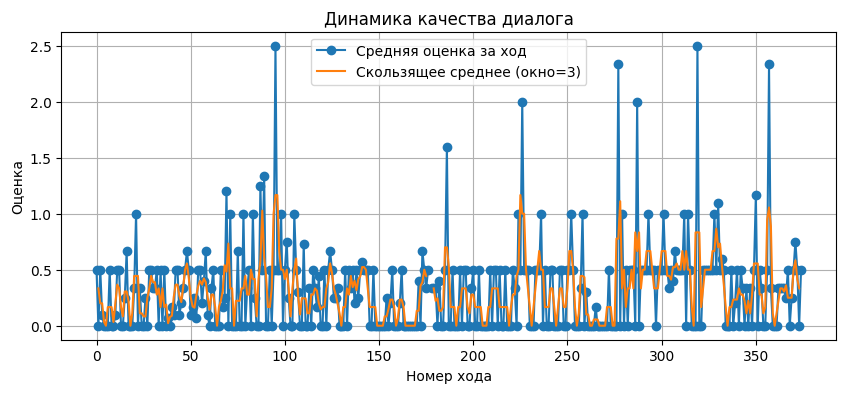

In [ ]:
all_turn_scores = []
for r1, r2 in zip(df['results_1'], df['results_2']):
    scores = []
    for r in [r1, r2]:
        if pd.notna(r) and r != "":
            scores.extend([float(x) for x in str(r).split(',') if x.strip() != ""])
    all_turn_scores.append(np.mean(scores) if scores else 0)

df['turn_avg_score'] = all_turn_scores
df['smoothed'] = df['turn_avg_score'].rolling(window=3, center=True).mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df.index, df['turn_avg_score'], 'o-', label='Средняя оценка за ход')
plt.plot(df.index, df['smoothed'], '-', label='Скользящее среднее (окно=3)')
plt.xlabel('Номер хода')
plt.ylabel('Оценка')
plt.legend()
plt.title('Динамика качества диалога')
plt.grid(True)
plt.show()

# 6. Предсказание оценки по тексту (baseline модель)
Можно ли предсказать оценку на основе TF-IDF + регрессия?


Собрать корпус → векторизовать → обучить LinearRegression.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

texts = []
labels = []

for tokens, scores in zip(all_tokens, all_scores):
    for t, s in zip(tokens, scores):
        # Пропускаем, если оценка — NaN или не число
        if pd.isna(s):
            continue
        try:
            s_clean = float(s)
            if not np.isnan(s_clean):
                texts.append(str(t))  # на случай, если t — не строка
                labels.append(s_clean)
        except (ValueError, TypeError):
            continue

# Проверка, что данные есть
if len(texts) == 0:
    print("Недостаточно валидных данных для обучения модели.")
else:
    # Обучение модели
    vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
    X = vectorizer.fit_transform(texts)
    y = np.array(labels)

    # Убедимся, что нет NaN в y
    valid_mask = ~np.isnan(y)
    X, y = X[valid_mask], y[valid_mask]

    if len(y) == 0:
        print("После фильтрации NaN данных не осталось.")
    else:
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        print(f"Baseline RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}")
        print("\nПример предсказания:")
        for i in range(min(3, len(texts))):
            print(f"  '{texts[i]}' → истинная: {y[i]:.1f}, предсказано: {y_pred[i]:.1f}")

Baseline RMSE: 0.521

Пример предсказания:
  'алнбк' → истинная: 1.0, предсказано: 0.3
  'бл' → истинная: 0.0, предсказано: 0.0
  'апрбг' → истинная: 1.0, предсказано: 0.2


# 7. Генерация "идеальной" реплики
Какая фраза получила максимальную оценку? Можно ли её использовать как шаблон?


Найти реплику с max(средняя оценка) и вывести её.

In [ ]:
best_replica = ("", -1)
for idx, row in df.iterrows():
    for side in ['1', '2']:
        text = row[f'actions_{side}']
        scores_str = row[f'results_{side}']
        if pd.isna(text) or not str(text).strip():
            continue
        try:
            scores = [float(x) for x in str(scores_str).split(',') if x.strip()]
            avg = np.mean(scores) if scores else 0
            if avg > best_replica[1]:
                best_replica = (text, avg, idx, side)
        except:
            continue

print(f"Лучшая реплика (оценка {best_replica[1]:.2f}):")
print(f"  Ход {best_replica[2]}, собеседник {best_replica[3]}: '{best_replica[0]}'")

Лучшая реплика (оценка 5.00):
  Ход 95, собеседник 1: 'ппудпр'


In [ ]:
df.columns

Index(['fighter1', 'fighter2', 'stage', 'start_ep', 'end_ep', 'attacker',
       'actions_1', 'actions_2', 'results_1', 'results_2', 'sum_1', 'sum_2',
       'turn_avg_score', 'smoothed'],
      dtype='object')

Длительность
Понимание, сколько "хватает" внимания


Плотность речи
Выявление стресса или вовлечённости


Динамика внутри эпизода
Понимание, как развивается диалог


Паузы между эпизодами
Анализ усталости или "остывания"

# Идея 1. Продолжительность эпизода и её связь с оценками
Длинные диалоги хуже или лучше коротких? Есть ли оптимальная длительность?

💡 Подход:
Преобразовать время в секунды.
Посчитать длительность = end_ep - start_ep.
 Корреляция с средней оценкой эпизода.

Корреляция длительности и оценки: 0.250


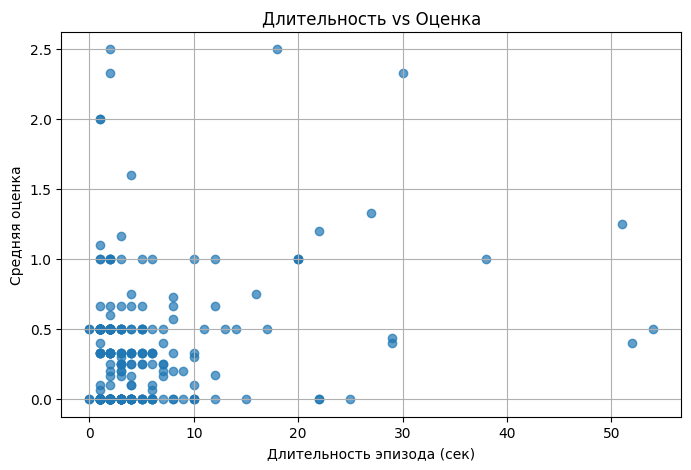

In [ ]:
import pandas as pd
import numpy as np



# Преобразуем время в секунды
def time_to_seconds(t):
    if pd.isna(t) or t == "":
        return np.nan
    try:
        m, s, h = map(int, str(t).split(':'))
        return h * 3600 + m * 60 + s
    except:
        return np.nan

df['start_sec'] = df['start_ep'].apply(time_to_seconds)
df['end_sec'] = df['end_ep'].apply(time_to_seconds)
df['duration_sec'] = df['end_sec'] - df['start_sec']
#взять модуль (осторожно!)
df['duration_sec'] = df['duration_sec'].abs()

# Средняя оценка за эпизод
def parse_scores_col(col):
    scores = []
    for r in col:
        if pd.notna(r) and str(r).strip() != "":
            try:
                scores.extend([float(x.strip()) for x in str(r).split(',') if x.strip() != ""])
            except:
                pass
    return np.mean(scores) if scores else 0

# Применяем к каждой строке (эпизоду)
episode_scores = []
for idx, row in df.iterrows():
    all_scores = []
    for col in ['results_1', 'results_2']:
        r = row[col]
        if pd.notna(r) and str(r).strip() != "":
            try:
                all_scores.extend([float(x.strip()) for x in str(r).split(',') if x.strip() != ""])
            except:
                pass
    episode_scores.append(np.mean(all_scores) if all_scores else np.nan)

df['episode_avg_score'] = episode_scores

# Корреляция
corr = df[['duration_sec', 'episode_avg_score']].corr().iloc[0, 1]
print(f"Корреляция длительности и оценки: {corr:.3f}")

# Визуализация
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df['duration_sec'], df['episode_avg_score'], alpha=0.7)
plt.xlabel('Длительность эпизода (сек)')
plt.ylabel('Средняя оценка')
plt.title('Длительность vs Оценка')
plt.grid(True)
plt.show()

# Идея 3. Плотность речи: сколько реплик в минуту?
Насколько интенсивен диалог? Может, высокая плотность = стресс?

💡 Подход:
Считаем общее число слов или реплик в эпизоде.
Делим на длительность → реплики/сек или слова/мин.

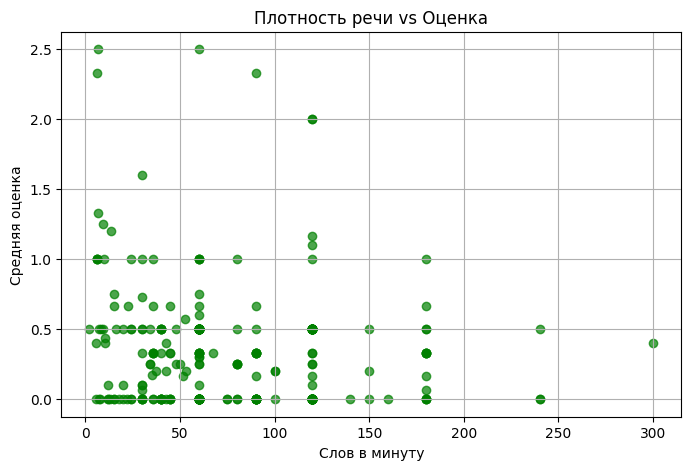

Средняя плотность: 79.22265070111855


In [ ]:
# Подсчёт числа слов в эпизоде
def count_words(text):
    if pd.isna(text) or str(text).strip() == "":
        return 0
    return len([w for w in str(text).split(',') if w.strip() != ""])

df['words_1'] = df['actions_1'].apply(count_words)
df['words_2'] = df['actions_2'].apply(count_words)
df['total_words'] = df['words_1'] + df['words_2']

# Плотность: слова в минуту
df['words_per_min'] = df['total_words'] / (df['duration_sec'] / 60)
df['words_per_min'] = df['words_per_min'].replace([np.inf, -np.inf], np.nan)

# Связь с оценкой
plt.figure(figsize=(8,5))
plt.scatter(df['words_per_min'], df['episode_avg_score'], alpha=0.7, color='green')
plt.xlabel('Слов в минуту')
plt.ylabel('Средняя оценка')
plt.title('Плотность речи vs Оценка')
plt.grid(True)
plt.show()

print("Средняя плотность:", df['words_per_min'].mean())

# Идея 4. Динамика в рамках эпизода: "разогрев" или "усталость"?
Оценки падают к концу эпизода? Или наоборот — диалог "раскачивается"?

💡 Подход:
Считаем позицию реплики внутри эпизода (1-я, 2-я, ...).
Строим scatter: позиция → оценка.
Для этого нужно распаковать данные в длинный формат.

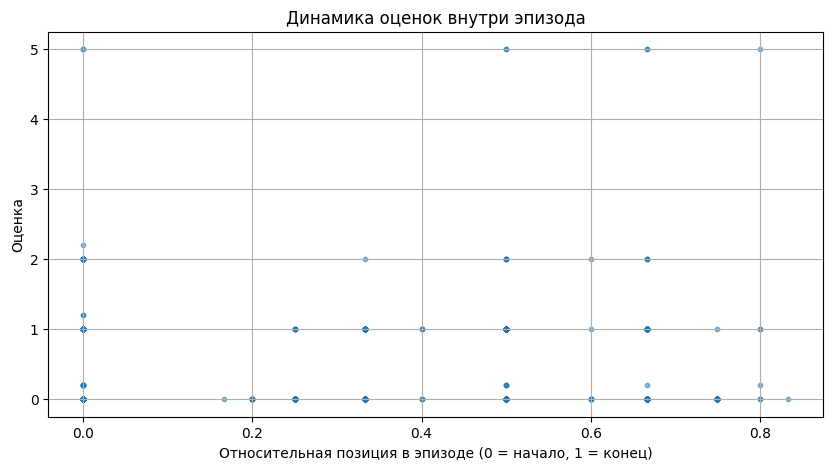

/tmp/ipython-input-2567908908.py:53: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



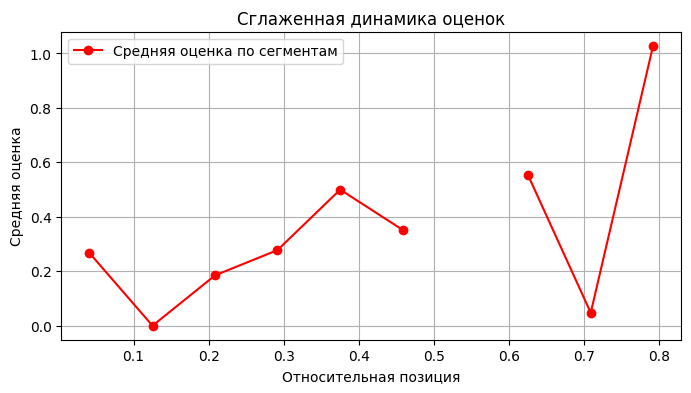

In [ ]:
# Создаём длинный формат: каждая реплика — отдельная строка
records = []
for idx, row in df.iterrows():
    ep_id = idx
    start = row['start_sec']
    duration = row['duration_sec']

    for side in ['1', '2']:
        actions = row[f'actions_{side}']
        results = row[f'results_{side}']

        if pd.isna(actions) or str(actions).strip() == "":
            continue

        tokens = [t.strip() for t in str(actions).split(',') if t.strip() != ""]
        try:
            scores = [float(x.strip()) for x in str(results).split(',') if x.strip() != ""] if pd.notna(results) else [0]*len(tokens)
        except:
            scores = [0]*len(tokens)

        # Выравнивание
        if len(scores) < len(tokens):
            scores += [0] * (len(tokens) - len(scores))
        else:
            scores = scores[:len(tokens)]

        # Для каждой реплики — позиция и нормализованное время
        for i, (tok, scr) in enumerate(zip(tokens, scores)):
            rel_time = i / len(tokens) if len(tokens) > 0 else 0  # 0..1
            abs_time = start + (duration * rel_time) if pd.notna(duration) and pd.notna(start) else np.nan
            records.append({
                'episode_id': ep_id,
                'position': i + 1,
                'relative_position': rel_time,
                'token': tok,
                'score': scr,
                'absolute_time_sec': abs_time
            })

long_df = pd.DataFrame(records)

# Визуализация: оценка vs относительная позиция
plt.figure(figsize=(10,5))
plt.scatter(long_df['relative_position'], long_df['score'], alpha=0.5, s=10)
plt.xlabel('Относительная позиция в эпизоде (0 = начало, 1 = конец)')
plt.ylabel('Оценка')
plt.title('Динамика оценок внутри эпизода')
plt.grid(True)
plt.show()

# Сглаженное среднее
long_df['bin'] = pd.cut(long_df['relative_position'], bins=10)
bin_means = long_df.groupby('bin')['score'].mean()
bin_centers = [(b.left + b.right)/2 for b in bin_means.index]

plt.figure(figsize=(8,4))
plt.plot(bin_centers, bin_means.values, 'ro-', label='Средняя оценка по сегментам')
plt.xlabel('Относительная позиция')
plt.ylabel('Средняя оценка')
plt.title('Сглаженная динамика оценок')
plt.grid(True)
plt.legend()
plt.show()

2.0

# Идея 5. Интервал между эпизодами → "остывание" или "нагрев"?
Если эпизоды идут подряд — как пауза между ними влияет на оценку следующего?

💡 Подход:
Сортируем по start_sec.
Считаем gap = start_ep[i] - end_ep[i-1].
Анализируем: короткий перерыв → выше оценка?

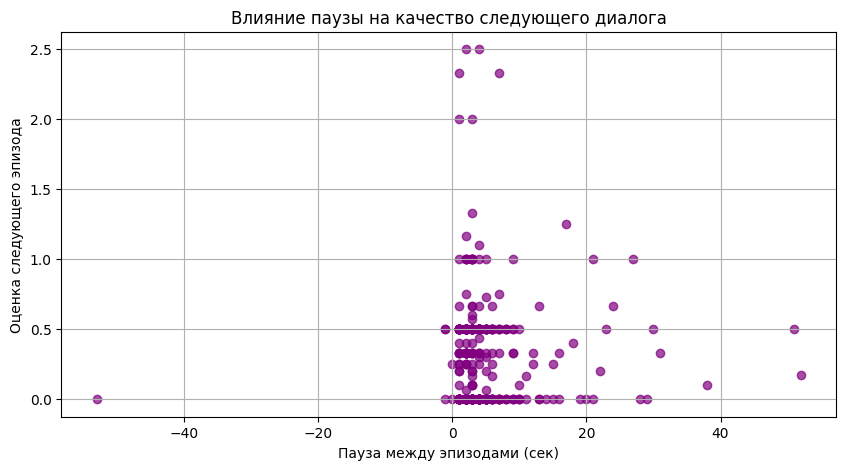

Корреляция паузы и оценки: 0.011603969903435757


In [ ]:
# Сортируем по времени начала
df_sorted = df.sort_values('start_sec').reset_index(drop=True)

# Вычисляем паузу между эпизодами
df_sorted['prev_end'] = df_sorted['end_sec'].shift(1)
df_sorted['gap_sec'] = df_sorted['start_sec'] - df_sorted['prev_end']

# Убираем первую строку (нет предыдущего)
df_gaps = df_sorted.dropna(subset=['gap_sec']).copy()

if len(df_gaps) > 0:
    plt.figure(figsize=(10,5))
    plt.scatter(df_gaps['gap_sec'], df_gaps['episode_avg_score'], alpha=0.7, color='purple')
    plt.xlabel('Пауза между эпизодами (сек)')
    plt.ylabel('Оценка следующего эпизода')
    plt.title('Влияние паузы на качество следующего диалога')
    plt.grid(True)
    plt.show()

    print("Корреляция паузы и оценки:", df_gaps[['gap_sec', 'episode_avg_score']].corr().iloc[0,1])
else:
    print("Недостаточно последовательных эпизодов для анализа пауз.")

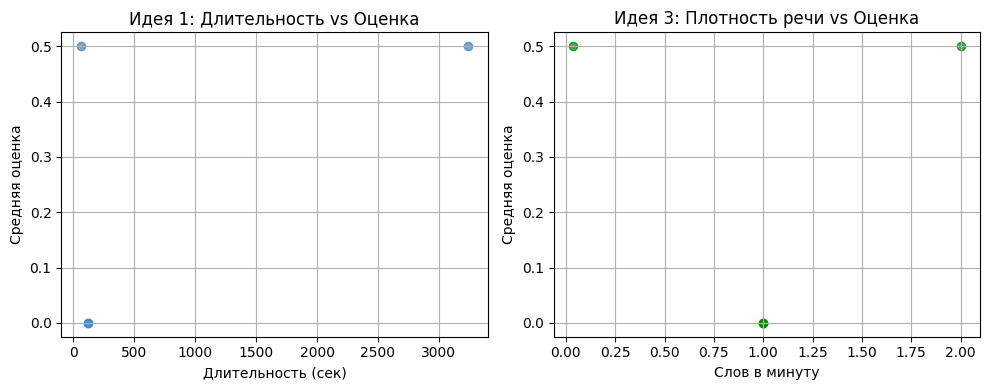

Статистика по валидным эпизодам:
Средняя длительность: 885.0 сек
Средняя плотность: 1.0 слов/мин
Корреляция длительности и оценки: 0.563
Корреляция плотности и оценки: 0.013


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re



# 🔧 Надёжный парсер времени формата MM:SS:00 или MM:SS
def robust_time_to_sec(t):
    if pd.isna(t) or str(t).strip() == "":
        return np.nan
    s = str(t).strip()
    # Попробуем HH:MM:SS (на случай, если часы есть)
    match = re.search(r'(\d{1,2}):(\d{2}):(\d{2})', s)
    if match:
        h, m, s_val = map(int, match.groups())
        return h * 3600 + m * 60 + s_val
    # Попробуем MM:SS
    match = re.search(r'(\d{1,2}):(\d{2})', s)
    if match:
        m, s_val = map(int, match.groups())
        return m * 60 + s_val
    return np.nan

# Преобразуем время в секунды
df['start_sec'] = df['start_ep'].apply(robust_time_to_sec)
df['end_sec'] = df['end_ep'].apply(robust_time_to_sec)

# Рассчитываем длительность
df['duration_sec'] = df['end_sec'] - df['start_sec']

# Подсчёт слов
def count_words(text):
    if pd.isna(text) or str(text).strip() == "":
        return 0
    return len([w for w in str(text).split(',') if w.strip() != ""])

df['words_1'] = df['actions_1'].apply(count_words)
df['words_2'] = df['actions_2'].apply(count_words)
df['total_words'] = df['words_1'] + df['words_2']

# Средняя оценка за эпизод
def get_episode_avg_score(r1, r2):
    scores = []
    for r in [r1, r2]:
        if pd.notna(r) and str(r).strip() != "":
            try:
                scores.extend([float(x.strip()) for x in str(r).split(',') if x.strip() != ""])
            except:
                pass
    return np.mean(scores) if scores else np.nan

df['episode_avg_score'] = df.apply(lambda row: get_episode_avg_score(row['results_1'], row['results_2']), axis=1)

# 🔒 Фильтрация: только валидные и положительные длительности
valid_mask = (
    df['duration_sec'].notna() &
    df['episode_avg_score'].notna() &
    (df['duration_sec'] > 0)  # избегаем деления на 0 и отрицательных значений
)
df_clean = df[valid_mask].copy()

if df_clean.empty:
    print("Нет валидных данных для анализа.")
else:
    # Идея 1: Длительность vs Оценка
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(df_clean['duration_sec'], df_clean['episode_avg_score'], alpha=0.7, color='steelblue')
    plt.xlabel('Длительность (сек)')
    plt.ylabel('Средняя оценка')
    plt.title('Идея 1: Длительность vs Оценка')
    plt.grid(True)

    # Идея 3: Слова в минуту
    df_clean['words_per_min'] = df_clean['total_words'] / (df_clean['duration_sec'] / 60)

    plt.subplot(1, 2, 2)
    plt.scatter(df_clean['words_per_min'], df_clean['episode_avg_score'], alpha=0.7, color='green')
    plt.xlabel('Слов в минуту')
    plt.ylabel('Средняя оценка')
    plt.title('Идея 3: Плотность речи vs Оценка')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Вывод статистики
    print("Статистика по валидным эпизодам:")
    print(f"Средняя длительность: {df_clean['duration_sec'].mean():.1f} сек")
    print(f"Средняя плотность: {df_clean['words_per_min'].mean():.1f} слов/мин")
    print(f"Корреляция длительности и оценки: {df_clean['duration_sec'].corr(df_clean['episode_avg_score']):.3f}")
    print(f"Корреляция плотности и оценки: {df_clean['words_per_min'].corr(df_clean['episode_avg_score']):.3f}")

# visual



Анализирует наиболее часто встречающиеся словосочетания (биграммы и триграммы).
Строит граф связей слов (word co-occurrence network) на основе соседства слов в тексте.
Визуализирует граф с помощью библиотек networkx и matplotlib.


Для русского языка замените 'english' на 'russian' в строке:
python



stop_words = set(stopwords.words('russian'))

И убедитесь, что у вас установлены русские стоп-слова (nltk.download('stopwords')).

Граф строится на основе окна соседства (по умолчанию 4 слова вперёд). Это означает, что слова, находящиеся близко друг к другу в предложении, считаются связанными.

Для больших текстов граф может стать слишком плотным — скрипт автоматически ограничивает его до 50 самых "важных" узлов.


In [ ]:
#pip install nltk networkx matplotlib collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


Топ-10 биграмм:
natural language: 2
the documents: 2
language processing: 1
processing nlp: 1
nlp subfield: 1
subfield linguistics: 1
linguistics computer: 1
computer science: 1
science and: 1
and artificial: 1

Топ-10 триграмм:
natural language processing: 1
language processing nlp: 1
processing nlp subfield: 1
nlp subfield linguistics: 1
subfield linguistics computer: 1
linguistics computer science: 1
computer science and: 1
science and artificial: 1
and artificial intelligence: 1
artificial intelligence concerned: 1


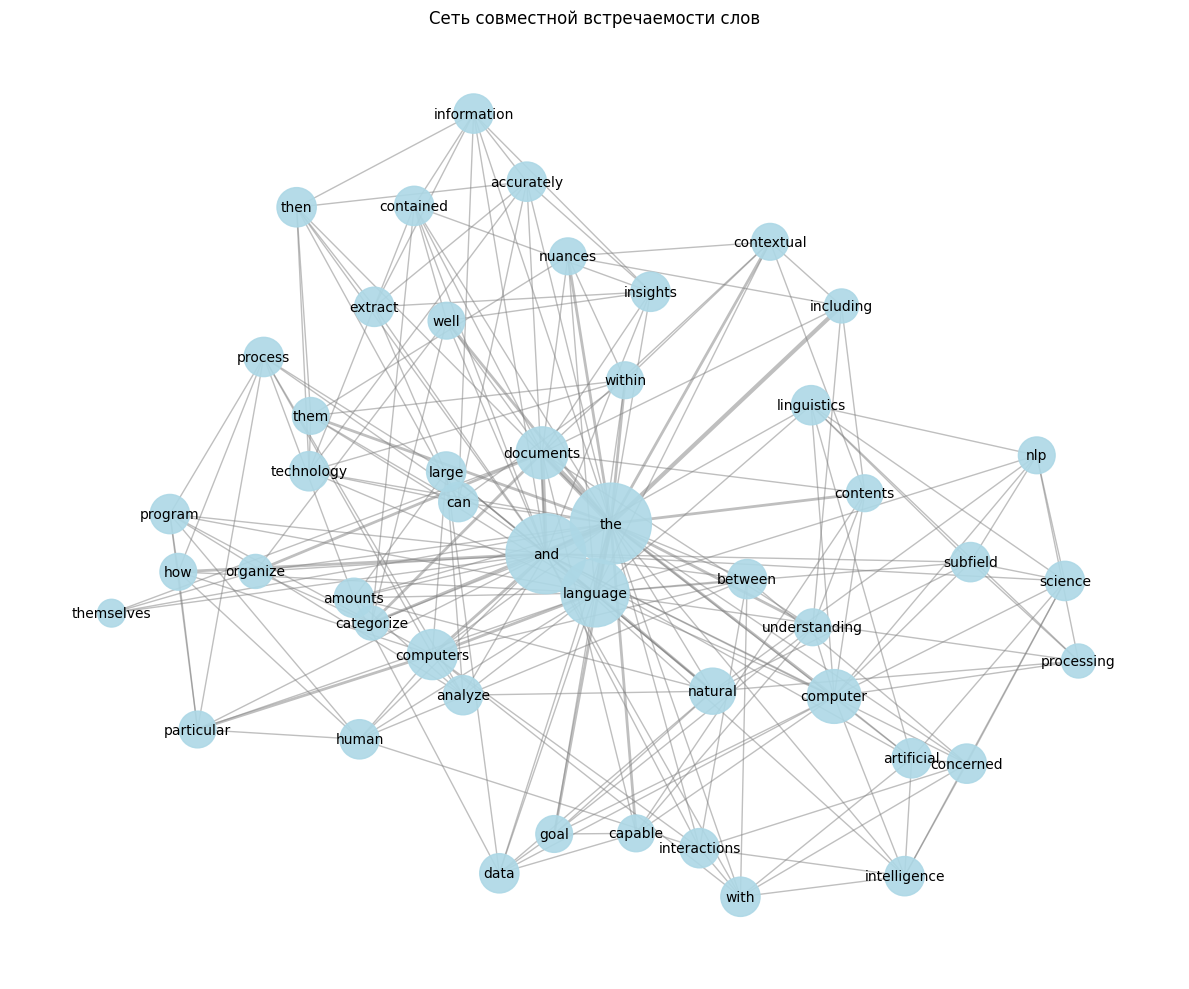

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка необходимых данных NLTK (выполняется один раз)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text(text):
    """Очистка и токенизация текста."""
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление пунктуации и цифр
    text = re.sub(r'[^a-z\s]', '', text)
    # Токенизация
    tokens = nltk.word_tokenize(text)
    # Удаление стоп-слов
    #stop_words = set(stopwords.words('english'))  # можно заменить на 'russian' для русского
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

def get_frequent_ngrams(tokens, n=2, top_k=10):
    """Получение самых частых n-грамм."""
    n_grams = list(ngrams(tokens, n))
    freq_ngrams = Counter(n_grams)
    return freq_ngrams.most_common(top_k)

def build_cooccurrence_graph(tokens, window_size=4):
    """Построение графа совместной встречаемости слов."""
    G = nx.Graph()
    for i, word in enumerate(tokens):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            neighbor = tokens[j]
            if word != neighbor:
                if G.has_edge(word, neighbor):
                    G[word][neighbor]['weight'] += 1
                else:
                    G.add_edge(word, neighbor, weight=1)
    return G

def visualize_graph(G, title="Word Co-occurrence Network"):
    """Визуализация графа."""
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=1, iterations=50)

    # Размер узлов пропорционален степени (количеству связей)
    degrees = dict(G.degree())
    node_sizes = [v * 100 for v in degrees.values()]

    # Веса рёбер
    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def analyze_text(text, top_ngrams=10, window_size=4):
    """Основная функция анализа текста."""
    tokens = preprocess_text(text)

    print("Топ-10 биграмм:")
    bigrams = get_frequent_ngrams(tokens, n=2, top_k=top_ngrams)
    for gram, freq in bigrams:
        print(f"{' '.join(gram)}: {freq}")

    print("\nТоп-10 триграмм:")
    trigrams = get_frequent_ngrams(tokens, n=3, top_k=top_ngrams)
    for gram, freq in trigrams:
        print(f"{' '.join(gram)}: {freq}")

    # Построение и визуализация графа
    G = build_cooccurrence_graph(tokens, window_size=window_size)
    # Ограничим граф до 50 самых связанных узлов для читаемости
    if len(G.nodes) > 50:
        # Выбираем топ-50 узлов по степени
        top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
        G = G.subgraph([node for node, deg in top_nodes]).copy()

    visualize_graph(G, "Сеть совместной встречаемости слов")

# Пример использования
if __name__ == "__main__":
    sample_text = """
    Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence
    concerned with the interactions between computers and human language, in particular how to program computers
    to process and analyze large amounts of natural language data. The goal is a computer capable of understanding
    the contents of documents, including the contextual nuances of the language within them. The technology can
    then accurately extract information and insights contained in the documents as well as categorize and organize
    the documents themselves.
    """

    analyze_text(sample_text)

In [ ]:
x = ngram_freq.keys()
keys_list = list(x)
keys_string = ', '.join(keys_list) # Joins with a comma and space
#print(keys_string)
# Output: a, b, c

In [ ]:
(keys_string)

'алнбк, бл, апрбг, ппб, апнпк, апрпг, апнпк апрпг, алнлк, апнлк, апрбк, ппбп, апрпк, апнбк, алнлк апрбг, алнбк апрбг, апнбг, апнпк апрбг, апрбг апнпк, апнпк апрбг апнпк, укл, укл ппб, апнр, зон, алнбг, апнбк алнбг, кабр, бл кабр, алрпг, -, ухуд, апнбк зон, апрбг ппб, апрпг ппб, апнпк ппб, апрпг алнбк, алнпк, алрбг, алнпк алрбг, алрбг апнбг, алнпк алрбг апнбг, апрпг алрпг, алрпг апрпг, апрпг алрбг, алрбг ппб, апрпг алрпг апрпг, алрпг апрпг алрбг, апрпг алрбг ппб, алвпг, апнбг алнбк, алнбк алвпг, алвпг апрпг, апрпг укл, апнбг алнбк алвпг, алнбк алвпг апрпг, алвпг апрпг укл, ппуд, кабр ппуд, бл кабр ппуд, апрпк ппб, ппб ппуд, апрпк ппб ппуд, апрбг алрбг, алрпг апнбг, апнбг бл, апрпг алрпг апнбг, алрпг апнбг бл, алнбк апнбк, апнбг апрбг, апнбг апрбг ппб, алрпк, алрпк апнр, ппудпр, апрпк апрбг, ппуд ппудпр, апрпк апрбг ппб, апрбг ппб ппуд, ппб ппуд ппудпр, алрпг апнбк, алрпг апрпг алрпг, алнрк, алнрк алрпг, зон алрпг, апрпг апнпк, алрпг апрпг апнпк, апнпк алрбг, алрбг алрбг, алрбг апрбг, ап

Принимает DataFrame pandas с текстовыми данными (например, столбец 'text').

Объединяет все тексты в один корпус (или обрабатывает построчно — по желанию).

Анализирует частотные словосочетания (биграммы/триграммы).

Строит и визуализирует граф совместной встречаемости слов на основе всего корпуса.

🔍 Предобработка текста...

✅ Всего токенов: 20

🔝 Топ-5 биграмм:
natural language: 1
language processing: 1
processing wonderful: 1
wonderful field: 1
field machine: 1

🔝 Топ-5 триграмм:
natural language processing: 1
language processing wonderful: 1
processing wonderful field: 1
wonderful field machine: 1
field machine learning: 1

🕸️ Построение графа совместной встречаемости...
📊 Граф содержит 18 узлов и 64 рёбер.


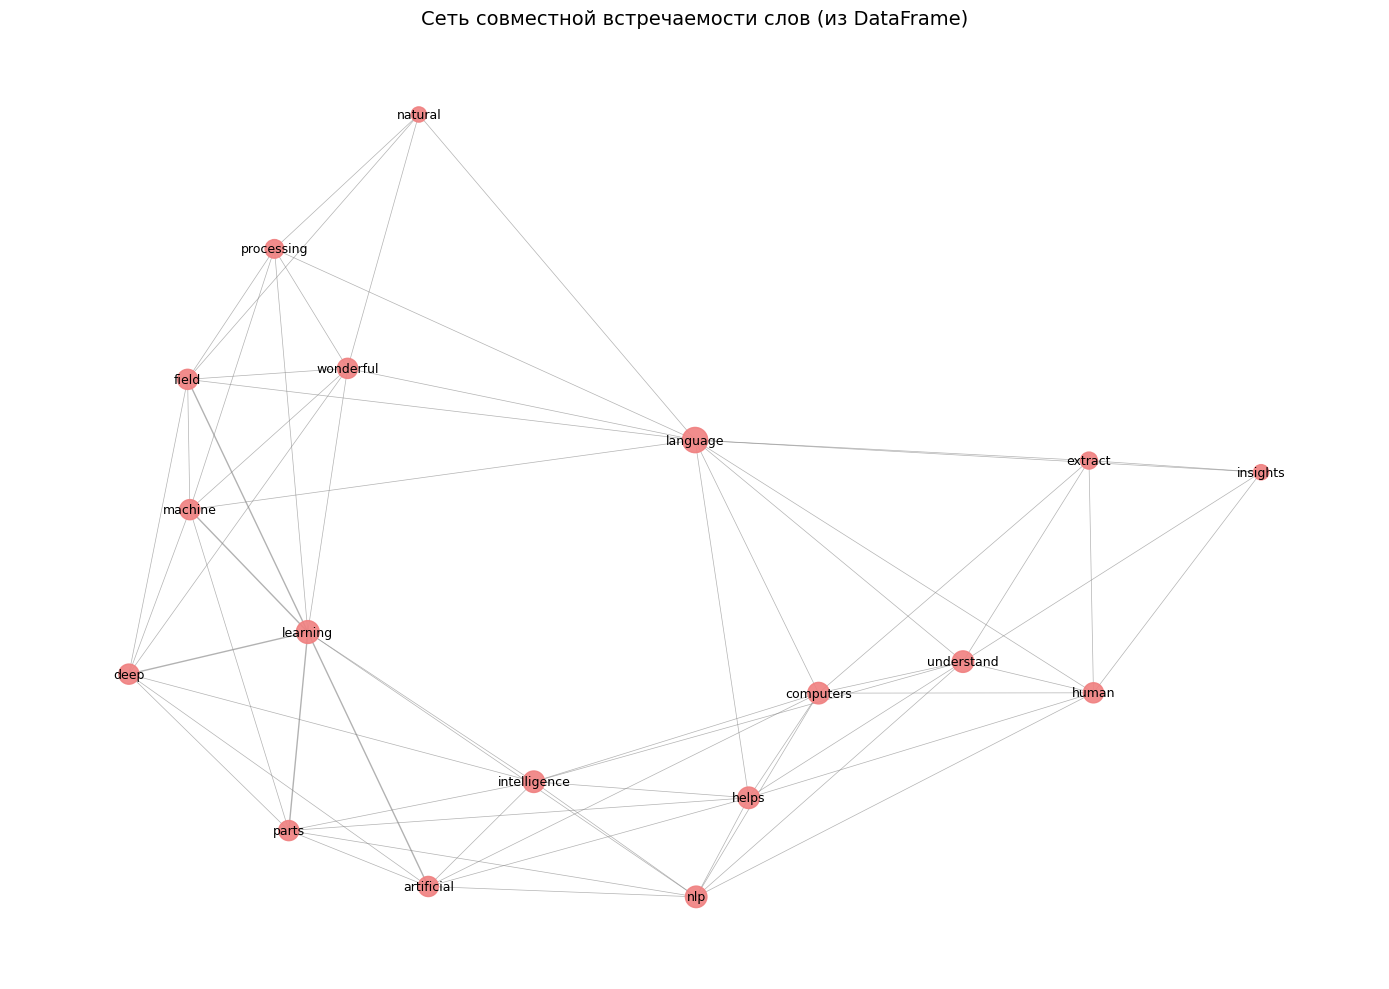

In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка NLTK-ресурсов (тихо)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text(text, language='english'):
    """
    Очистка и токенизация одного текста.
    Поддерживает 'english' и 'russian'.
    """
    if pd.isna(text):
        return []
    text = str(text).lower()
    # Удаление всего, кроме букв и пробелов
    text = re.sub(r'[^a-zа-яё\s]', '', text, flags=re.IGNORECASE)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words(language))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

def get_corpus_from_dataframe(df, text_column='text', language='english'):
    """
    Извлекает и объединяет все тексты из столбца DataFrame в единый список токенов.
    """
    all_tokens = []
    for text in df[text_column]:
        tokens = preprocess_text(text, language=language)
        all_tokens.extend(tokens)
    return all_tokens

def get_frequent_ngrams(tokens, n=2, top_k=10):
    """Получение топ-N n-грамм."""
    n_grams = list(ngrams(tokens, n))
    freq_ngrams = Counter(n_grams)
    return freq_ngrams.most_common(top_k)

def build_cooccurrence_graph(tokens, window_size=4):
    """Строит граф совместной встречаемости слов в пределах окна."""
    G = nx.Graph()
    for i, word in enumerate(tokens):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            neighbor = tokens[j]
            if word != neighbor:
                if G.has_edge(word, neighbor):
                    G[word][neighbor]['weight'] += 1
                else:
                    G.add_edge(word, neighbor, weight=1)
    return G

def visualize_graph(G, title="Word Co-occurrence Network"):
    """Визуализация графа."""
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

    degrees = dict(G.degree())
    node_sizes = [max(v * 30, 100) for v in degrees.values()]  # Минимальный размер узла

    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]
    edge_widths = [w * 0.5 for w in weights]  # Масштабируем толщину

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightcoral', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def analyze_dataframe(df, text_column='text', language='english', top_ngrams=10, window_size=4, max_nodes=50):
    """
    Полный анализ текстового DataFrame.

    Параметры:
    - df: pandas.DataFrame
    - text_column: имя столбца с текстом
    - language: 'english' или 'russian'
    - top_ngrams: сколько топ-n-грамм выводить
    - window_size: размер окна для построения графа
    - max_nodes: максимальное число узлов в графе (для читаемости)
    """
    print("🔍 Предобработка текста...")
    tokens = get_corpus_from_dataframe(df, text_column=text_column, language=language)

    if not tokens:
        print("⚠️ Нет токенов после предобработки. Проверьте данные и язык.")
        return

    print(f"\n✅ Всего токенов: {len(tokens)}")

    # Анализ n-грамм
    print(f"\n🔝 Топ-{top_ngrams} биграмм:")
    bigrams = get_frequent_ngrams(tokens, n=2, top_k=top_ngrams)
    for gram, freq in bigrams:
        print(f"{' '.join(gram)}: {freq}")

    print(f"\n🔝 Топ-{top_ngrams} триграмм:")
    trigrams = get_frequent_ngrams(tokens, n=3, top_k=top_ngrams)
    for gram, freq in trigrams:
        print(f"{' '.join(gram)}: {freq}")

    # Построение графа
    print("\n🕸️ Построение графа совместной встречаемости...")
    G = build_cooccurrence_graph(tokens, window_size=window_size)

    if len(G.nodes) == 0:
        print("⚠️ Граф пуст. Возможно, текст слишком короткий или не содержит связей.")
        return

    # Ограничение числа узлов для визуализации
    if len(G.nodes) > max_nodes:
        top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:max_nodes]
        G = G.subgraph([node for node, deg in top_nodes]).copy()

    print(f"📊 Граф содержит {G.number_of_nodes()} узлов и {G.number_of_edges()} рёбер.")
    visualize_graph(G, "Сеть совместной встречаемости слов (из DataFrame)")

# Пример использования
if __name__ == "__main__":
    # Пример DataFrame
    data = {
        'id': [1, 2, 3],
        'text': [
            "Natural language processing is a wonderful field of AI.",
            "Machine learning and deep learning are parts of artificial intelligence.",
            "NLP helps computers understand human language and extract insights."
        ]
    }
    df = pd.DataFrame(data)

    # Анализ
    analyze_dataframe(df, text_column='text', language='english', top_ngrams=5)

In [ ]:
x = pd.DataFrame(ngram_freq.items(), columns=['Item', 'Count'])
x.columns

Index(['Item', 'Count'], dtype='object')

In [ ]:
x = pd.DataFrame([keys_string], columns=['Item'])
x.columns

Index(['Item'], dtype='object')

In [ ]:
x

,Item
0,"алнбк, бл, апрбг, ппб, апнпк, апрпг, апнпк апр..."


🔍 Предобработка текста...

✅ Всего токенов: 575

🔝 Топ-5 биграмм:
алрбг алрбг: 17
апрпг апрпг: 17
апрпг алнбк: 12
алнбк алнбк: 11
апрпг алрпг: 9

🔝 Топ-5 триграмм:
алрбг алрбг алрбг: 7
апрпг апрпг апрпг: 5
апрпг алрпг апрпг: 4
апрпг алнбк апрпг: 4
алрбг алрбг апрбг: 3

🕸️ Построение графа совместной встречаемости...
📊 Граф содержит 44 узлов и 306 рёбер.


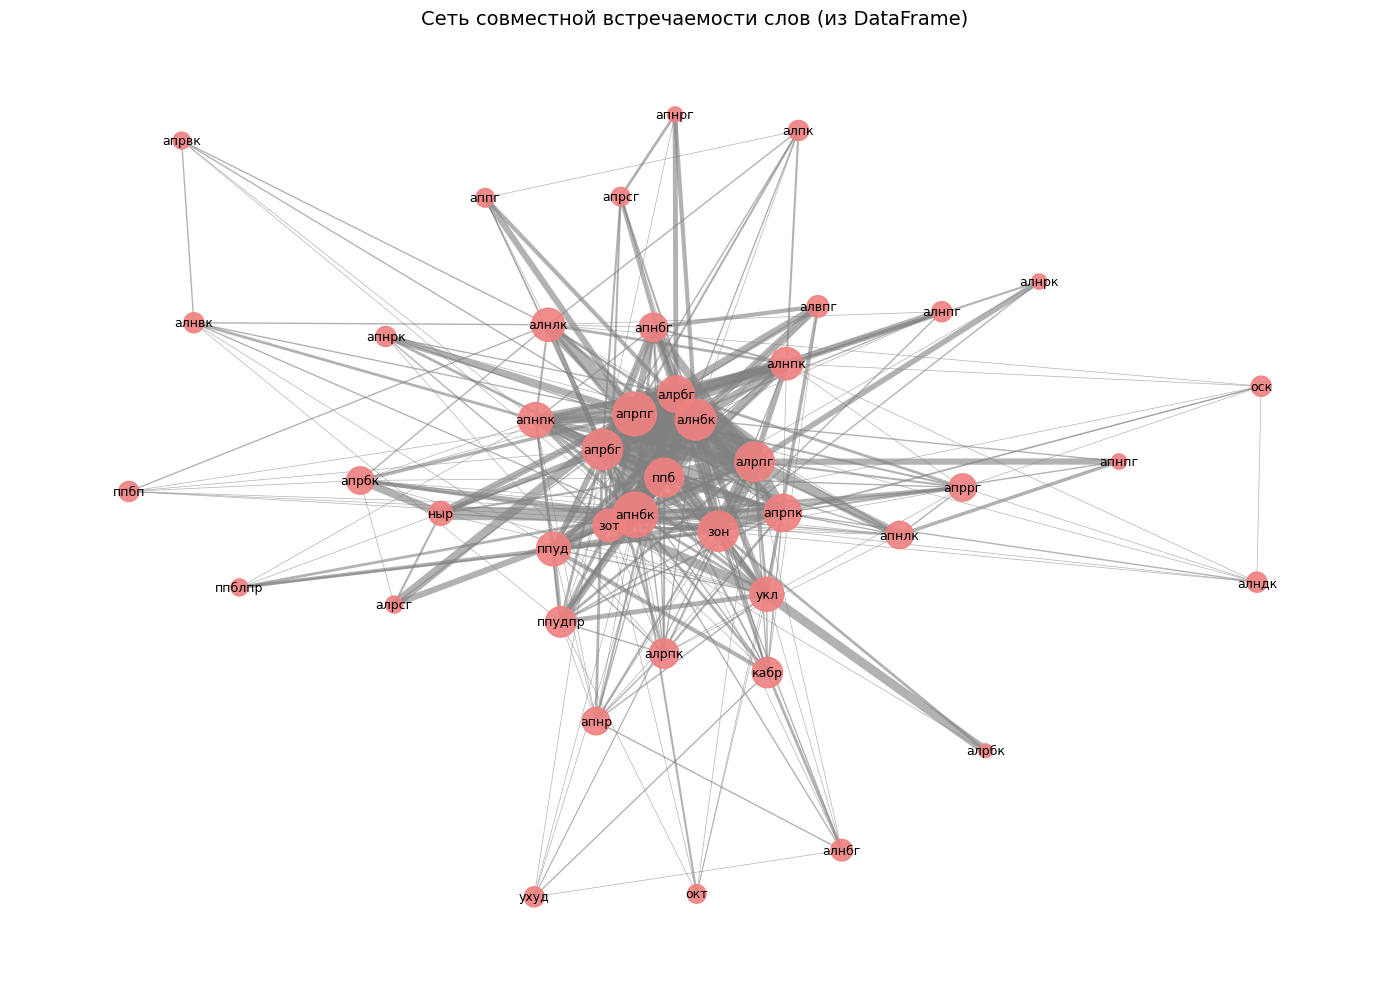

In [ ]:
analyze_dataframe(x, text_column='Item', language='russian', top_ngrams=5)

дополнительная функция, которая позволяет:

Выбрать одно или несколько ключевых слов (например, ['ai', 'language']),

Найти все биграммы и триграммы, содержащие эти слова,

Построить подграф, показывающий связи этих слов с их соседями в корпусе,

Визуализировать локальную сеть вокруг выбранных слов.

Это особенно полезно для анализа контекста упоминания конкретных терминов.
Для русского языка: target_words=['модель', 'язык'], language='russian'.

Функция автоматически покажет:

Граф с выделенными целевыми словами (красные узлы),

Их прямые связи,

Топ биграмм/триграмм с участием этих слов.

In [ ]:
def visualize_word_context(df, target_words, text_column='text', language='english', window_size=4, max_hops=1):
    """
    Визуализирует контекстные связи для заданных целевых слов.

    Параметры:
    - df: pandas.DataFrame с текстами
    - target_words: список слов (в нижнем регистре!), например ['ai', 'nlp']
    - text_column: имя столбца с текстом
    - language: 'english' или 'russian'
    - window_size: размер окна для построения графа
    - max_hops: глубина поиска соседей (1 = прямые соседи, 2 = соседи соседей и т.д.)
    """
    target_words = [word.lower() for word in target_words]

    # Получаем полный корпус токенов
    tokens = get_corpus_from_dataframe(df, text_column=text_column, language=language)
    if not tokens:
        print("⚠️ Корпус пуст после предобработки.")
        return

    # Строим полный граф совместной встречаемости
    full_graph = build_cooccurrence_graph(tokens, window_size=window_size)

    # Находим подграф вокруг целевых слов
    nodes_to_include = set()
    for word in target_words:
        if word in full_graph:
            # Прямые соседи (1-hop)
            neighbors = set(full_graph.neighbors(word))
            nodes_to_include.update([word])
            nodes_to_include.update(neighbors)

            # Если нужно — добавляем соседей 2-го порядка
            if max_hops >= 2:
                for n in neighbors:
                    if n in full_graph:
                        nodes_to_include.update(full_graph.neighbors(n))
        else:
            print(f"⚠️ Слово '{word}' не найдено в графе.")

    if not nodes_to_include:
        print("❌ Ни одно из целевых слов не найдено в тексте.")
        return

    # Создаём подграф
    subgraph = full_graph.subgraph(nodes_to_include).copy()

    # Визуализация
    plt.figure(figsize=(12, 9))
    pos = nx.spring_layout(subgraph, k=1.0, iterations=100, seed=42)

    # Цвета: целевые слова — красные, остальные — синие
    node_colors = []
    node_sizes = []
    for node in subgraph.nodes():
        if node in target_words:
            node_colors.append('red')
            node_sizes.append(800)  # Крупнее
        else:
            node_colors.append('lightblue')
            node_sizes.append(300)

    # Рёбра
    edges = subgraph.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]
    edge_widths = [w * 0.8 for w in weights]

    nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(subgraph, pos, width=edge_widths, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(subgraph, pos, font_size=10, font_family='sans-serif')

    # Легенда
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Целевые слова', markerfacecolor='red', markersize=12),
        Line2D([0], [0], marker='o', color='w', label='Контекстные слова', markerfacecolor='lightblue', markersize=12)
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.title(f"Контекстные связи для слов: {', '.join(target_words)}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Дополнительно: вывод биграмм и триграмм с участием целевых слов
    print(f"\n🔍 Биграммы и триграммы с участием слов: {target_words}")

    # Получаем все n-граммы из корпуса
    bigrams_all = list(ngrams(tokens, 2))
    trigrams_all = list(ngrams(tokens, 3))

    # Фильтрация
    bigrams_with_target = [gram for gram in bigrams_all if any(w in target_words for w in gram)]
    trigrams_with_target = [gram for gram in trigrams_all if any(w in target_words for w in gram)]

    # Подсчёт частот
    bigram_counts = Counter(bigrams_with_target)
    trigram_counts = Counter(trigrams_with_target)

    print("\n🔝 Топ-10 биграмм с участием целевых слов:")
    for gram, freq in bigram_counts.most_common(10):
        print(f"{' '.join(gram)}: {freq}")

    print("\n🔝 Топ-10 триграмм с участием целевых слов:")
    for gram, freq in trigram_counts.most_common(10):
        print(f"{' '.join(gram)}: {freq}")


=== Анализ контекста для слов: ' ===


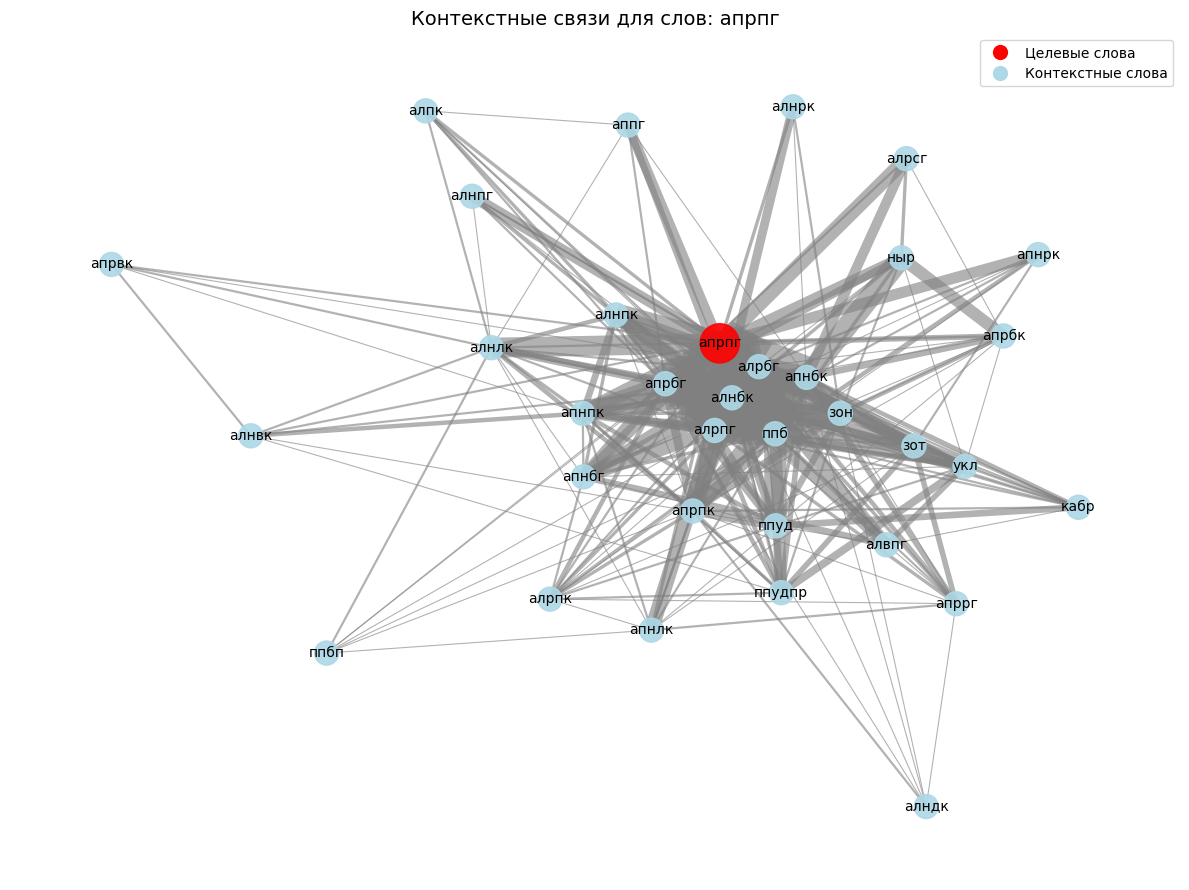


🔍 Биграммы и триграммы с участием слов: ['апрпг']

🔝 Топ-10 биграмм с участием целевых слов:
апрпг апрпг: 17
апрпг алнбк: 12
апрпг алрпг: 9
алрпг апрпг: 9
ппб апрпг: 8
апнбк апрпг: 6
алнбк апрпг: 5
апнпк апрпг: 4
апрпг ппб: 4
апрпг алрбг: 4

🔝 Топ-10 триграмм с участием целевых слов:
апрпг апрпг апрпг: 5
апрпг алрпг апрпг: 4
апрпг алнбк апрпг: 4
алнбк апрпг алнбк: 3
алнбк ппб апрпг: 3
ппб апрпг алнбк: 2
апнбг апрпг алрпг: 2
алрпг апрпг апрпг: 2
апрпг алрбг алрбг: 2
ппб апрпг алрпг: 2


In [ ]:
    # 2. Анализ контекста для конкретных слов
    print("\n=== Анализ контекста для слов: ' ===")
    visualize_word_context(
        x,
        target_words=['апрпг'],  # слова в нижнем регистре!
        text_column='Item',
        language='russian',
        window_size=4,
        max_hops=1
    )

Cкрипт:

Извлекает слова, биграммы и триграммы из текстового корпуса (из pandas DataFrame).

Строит векторные представления (TF-IDF) для всех n-грамм.

Выполняет кластерный анализ с помощью алгоритма K-Means.

Визуализирует кластеры с помощью t-SNE (для 2D-проекции).

Поддерживает любой язык (английский/русский) и работает с pandas DataFrame.


In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np

# Загрузка NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text_simple(text, language='english'):
    """Простая предобработка: нижний регистр, удаление пунктуации, стоп-слова."""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zа-яё\s]', ' ', text, flags=re.IGNORECASE)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words(language))
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

def get_all_ngrams_as_strings(df, text_column='text', language='english', include_unigrams=True, include_bigrams=True, include_trigrams=True):
    """
    Возвращает список строк: каждая строка — это слово, биграмма или триграмма.
    Используется для кластеризации отдельных n-грамм как "документов".
    """
    all_ngrams_list = []

    for text in df[text_column]:
        clean = preprocess_text_simple(text, language=language)
        if not clean.strip():
            continue
        tokens = clean.split()

        if include_unigrams:
            all_ngrams_list.extend(tokens)
        if include_bigrams and len(tokens) >= 2:
            bigrams = [' '.join(gram) for gram in ngrams(tokens, 2)]
            all_ngrams_list.extend(bigrams)
        if include_trigrams and len(tokens) >= 3:
            trigrams_list = [' '.join(gram) for gram in ngrams(tokens, 3)]
            all_ngrams_list.extend(trigrams_list)

    # Удаляем дубликаты? Нет — оставляем частоту для TF-IDF!
    return all_ngrams_list

def cluster_ngrams(df, text_column='text', language='english',
                   include_unigrams=True, include_bigrams=True, include_trigrams=True,
                   n_clusters=5, ngram_min_df=1, ngram_max_features=1000,
                   random_state=42):
    """
    Кластеризация n-грамм (слов, биграмм, триграмм) как отдельных "документов".
    """
    print("🔍 Извлечение всех n-грамм...")
    ngram_docs = get_all_ngrams_as_strings(
        df, text_column=text_column, language=language,
        include_unigrams=include_unigrams,
        include_bigrams=include_bigrams,
        include_trigrams=include_trigrams
    )

    if len(ngram_docs) == 0:
        print("⚠️ Нет n-грамм для кластеризации.")
        return

    print(f"✅ Всего n-грамм (с повторами): {len(ngram_docs)}")
    unique_ngrams = list(set(ngram_docs))
    print(f"✅ Уникальных n-грамм: {len(unique_ngrams)}")

    # Векторизация: каждая n-грамма — "документ", TF-IDF по символам или под-n-граммам?
    # Но так как это отдельные фразы, лучше использовать char-ngrams или просто 1-вектор на фразу.
    # Однако для схожести фраз (например, "machine learning" и "deep learning") — используем char-level TF-IDF.

    # Альтернатива: рассматривать каждую n-грамму как документ и использовать word-level TF-IDF по её словам.
    # Но у нас каждая "фраза" — уже токен. Поэтому проще использовать **char-ngram TF-IDF** для сравнения строк.

    vectorizer = TfidfVectorizer(
        analyzer='char_wb',        # char-level с границами слов
        ngram_range=(2, 5),        # 2–5 символьных n-грамм
        min_df=ngram_min_df,
        max_features=ngram_max_features
    )

    X = vectorizer.fit_transform(unique_ngrams)
    print(f"📊 Размер матрицы признаков: {X.shape}")

    # Кластеризация
    print(f"🧠 Кластеризация на {n_clusters} кластеров...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    clusters = kmeans.fit_predict(X)

    # Снижение размерности для визуализации
    print("📉 Применение t-SNE для 2D-визуализации...")
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=min(30, len(unique_ngrams)-1))
    X_tsne = tsne.fit_transform(X.toarray())

    # Визуализация
    plt.figure(figsize=(12, 9))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(f"Кластеры n-грамм (слов, биграмм, триграмм) — {n_clusters} кластеров", fontsize=14)
    plt.xlabel("t-SNE компонент 1")
    plt.ylabel("t-SNE компонент 2")
    plt.tight_layout()
    plt.show()

    # Вывод примеров из каждого кластера
    df_ngrams = pd.DataFrame({
        'ngram': unique_ngrams,
        'cluster': clusters
    })

    print(f"\n🔍 Примеры n-грамм по кластерам (топ-5 на кластер):")
    for cluster_id in range(n_clusters):
        examples = df_ngrams[df_ngrams['cluster'] == cluster_id]['ngram'].head(5).tolist()
        print(f"\nКластер {cluster_id}:")
        for ex in examples:
            print(f"  - {ex}")

    return df_ngrams, X, clusters

🔍 Извлечение всех n-грамм...
✅ Всего n-грамм (с повторами): 939
✅ Уникальных n-грамм: 244
📊 Размер матрицы признаков: (244, 375)
🧠 Кластеризация на 4 кластеров...
📉 Применение t-SNE для 2D-визуализации...


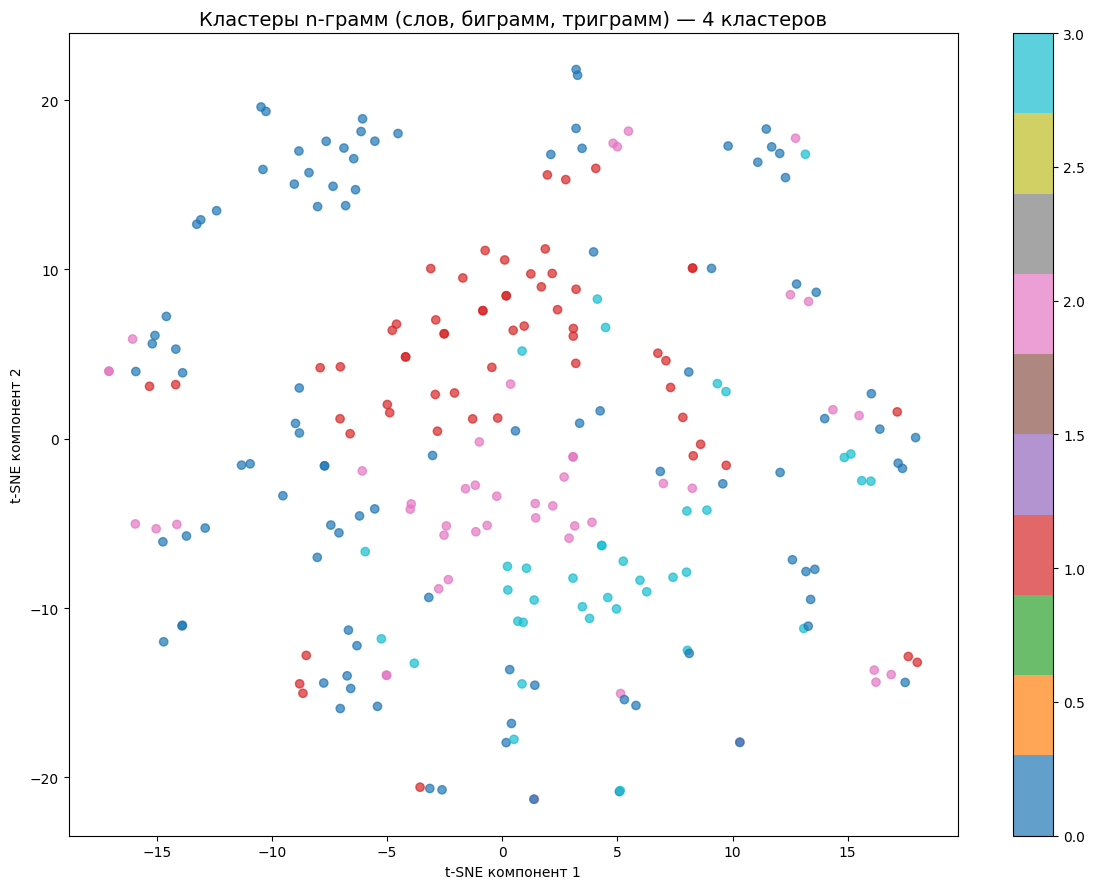


🔍 Примеры n-грамм по кластерам (топ-5 на кластер):

Кластер 0:
  - зон
  - алнлк
  - укл апнбк
  - ппб зот
  - апнрг алнбк

Кластер 1:
  - апнпк алрбг алрбг
  - апрпг алрбг ппб
  - апрбг зот
  - апнпк апрбг
  - апрпг алнбк алрбг

Кластер 2:
  - апрпг алнбк апрпг
  - апрпг
  - апрпг алнбк апнбк
  - апрпг алпк
  - ппб апрпг

Кластер 3:
  - алрпг алнпк
  - алрпг алнбк алрпг
  - алрпг апнлк
  - алрпг апрбг
  - алрпг апрпг апнпк


In [ ]:
if __name__ == "__main__":

    # Запуск кластерного анализа
    result_df, X, labels = cluster_ngrams(
        x,
        text_column='Item',
        language='russian',
        include_unigrams=True,
        include_bigrams=True,
        include_trigrams=True,
        n_clusters=4,
        ngram_max_features=800
    )

 версия скрипта, которая:

✅ Автоматически выбирает оптимальное число кластеров с помощью метода локтя (elbow) и коэффициента силуэта (silhouette score).

✅ Использует word embeddings (через gensim и предобученные модели FastText или Word2Vec) для векторизации слов и n-грамм.

✅ Поддерживает русский и английский языки.

✅ Работает с pandas DataFrame.

✅ Визуализирует результаты кластеризации в 2D с подписями кластеров и примерами.

In [ ]:
pip install gensim tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 28.0 MB/s eta 0:00:00


In [ ]:
import re
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
from gensim.downloader import load as load_gensim_model
import warnings
warnings.filterwarnings("ignore")

# Загрузка NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# ----------------------------
# 1. Предобработка текста
# ----------------------------
def preprocess_tokens(text, language='english'):
    """Возвращает список токенов (без стоп-слов, пунктуации)."""
    if pd.isna(text):
        return []
    text = str(text).lower()
    text = re.sub(r'[^a-zа-яё\s]', ' ', text, flags=re.IGNORECASE)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words(language))
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return tokens

# ----------------------------
# 2. Загрузка embedding-модели
# ----------------------------
def load_embedding_model(language='english'):
    """
    Загружает предобученную модель FastText или Word2Vec.
    Поддержка: 'english' → 'word2vec-google-news-300', 'russian' → 'fasttext-wiki-news-subwords-300'
    """
    model_map = {
        'english': 'word2vec-google-news-300',
        'russian': 'fasttext-wiki-news-subwords-300'
    }

    if language not in model_map:
        raise ValueError("Поддерживаемые языки: 'english', 'russian'")

    model_name = model_map[language]
    print(f"📥 Загрузка embedding-модели для '{language}' ({model_name})...")
    try:
        model = load_gensim_model(model_name)
        print("✅ Модель загружена.")
        return model
    except Exception as e:
        print(f"❌ Ошибка загрузки модели: {e}")
        print("Убедитесь, что у вас стабильное интернет-соединение.")
        raise

# ----------------------------
# 3. Векторизация n-грамм через усреднение embeddings слов
# ----------------------------
def get_ngram_vectors(df, text_column='text', language='english',
                      include_unigrams=True, include_bigrams=True, include_trigrams=True):
    """
    Возвращает:
    - список уникальных n-грамм (строки),
    - матрицу векторов (numpy array),
    - модель embeddings.
    """
    print("🔍 Извлечение всех n-грамм...")
    ngram_counter = defaultdict(int)

    for text in df[text_column]:
        tokens = preprocess_tokens(text, language=language)
        if not tokens:
            continue
        if include_unigrams:
            for w in tokens:
                ngram_counter[w] += 1
        if include_bigrams and len(tokens) >= 2:
            for gram in ngrams(tokens, 2):
                ngram_counter[' '.join(gram)] += 1
        if include_trigrams and len(tokens) >= 3:
            for gram in ngrams(tokens, 3):
                ngram_counter[' '.join(gram)] += 1

    unique_ngrams = list(ngram_counter.keys())
    print(f"✅ Уникальных n-грамм: {len(unique_ngrams)}")

    # Загрузка модели
    model = load_embedding_model(language=language)
    vector_size = model.vector_size

    # Векторизация: усреднение векторов слов в n-грамме
    vectors = []
    valid_ngrams = []

    for ng in unique_ngrams:
        words = ng.split()
        word_vectors = []
        for w in words:
            if w in model:
                word_vectors.append(model[w])
        if word_vectors:
            avg_vec = np.mean(word_vectors, axis=0)
            vectors.append(avg_vec)
            valid_ngrams.append(ng)
        # Если ни одно слово не найдено — пропускаем n-грамму

    print(f"✅ Векторизовано n-грамм: {len(vectors)}")
    return valid_ngrams, np.array(vectors), model

# ----------------------------
# 4. Автоматический выбор числа кластеров
# ----------------------------
def find_optimal_clusters(X, max_k=10, random_state=42):
    """
    Использует метод локтя и silhouette score для выбора K.
    Возвращает оптимальное K.
    """
    if X.shape[0] < 3:
        return min(2, X.shape[0])

    max_k = min(max_k, X.shape[0] - 1)
    if max_k < 2:
        return 1

    inertias = []
    silhouettes = []
    K_range = range(2, max_k + 1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    # Выбор по silhouette (максимум)
    optimal_k = K_range[np.argmax(silhouettes)]

    # Визуализация
    fig, ax1 = plt.subplots(figsize=(10, 4))

    color = 'tab:blue'
    ax1.set_xlabel('Число кластеров (k)')
    ax1.set_ylabel('Inertia (метод локтя)', color=color)
    ax1.plot(K_range, inertias, 'o-', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(K_range, silhouettes, 's--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Оптимальное число кластеров: k = {optimal_k} (по silhouette)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return optimal_k

# ----------------------------
# 5. Кластеризация и визуализация
# ----------------------------
def cluster_ngrams_with_embeddings(df, text_column='text', language='english',
                                   include_unigrams=True, include_bigrams=True, include_trigrams=True,
                                   max_k=10, random_state=42):
    """
    Полный pipeline: от текста до кластеров с embeddings и автоматическим выбором K.
    """
    # 1. Получаем векторы
    ngrams_list, X, model = get_ngram_vectors(
        df, text_column=text_column, language=language,
        include_unigrams=include_unigrams,
        include_bigrams=include_bigrams,
        include_trigrams=include_trigrams
    )

    if X.size == 0:
        print("❌ Нет векторизуемых n-грамм.")
        return None

    # 2. Выбор оптимального K
    print("🧠 Поиск оптимального числа кластеров...")
    optimal_k = find_optimal_clusters(X, max_k=max_k, random_state=random_state)
    print(f"✅ Выбрано k = {optimal_k}")

    # 3. Кластеризация
    kmeans = KMeans(n_clusters=optimal_k, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X)

    # 4. Визуализация через t-SNE
    print("📉 Применение t-SNE...")
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=min(30, X.shape[0]-1))
    X_2d = tsne.fit_transform(X)

    plt.figure(figsize=(12, 9))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', alpha=0.8)
    plt.colorbar(scatter, label='Кластер')
    plt.title(f"Кластеры n-грамм (Embeddings + K-Means, k={optimal_k})", fontsize=14)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.tight_layout()
    plt.show()

    # 5. Вывод примеров
    df_result = pd.DataFrame({'ngram': ngrams_list, 'cluster': labels})
    print(f"\n🔍 Примеры n-грамм по кластерам (топ-5):")
    for cluster_id in range(optimal_k):
        examples = df_result[df_result['cluster'] == cluster_id]['ngram'].head(5).tolist()
        print(f"\nКластер {cluster_id}:")
        for ex in examples:
            print(f"  - {ex}")

    return df_result, X, labels, optimal_k

🔍 Извлечение всех n-грамм...
✅ Уникальных n-грамм: 164
📥 Загрузка embedding-модели для 'english' (word2vec-google-news-300)...
✅ Модель загружена.
✅ Векторизовано n-грамм: 164
🧠 Поиск оптимального числа кластеров...


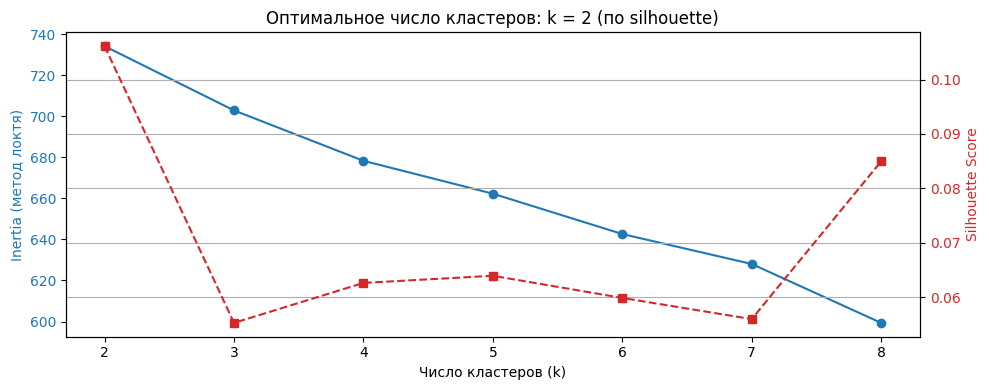

✅ Выбрано k = 2
📉 Применение t-SNE...


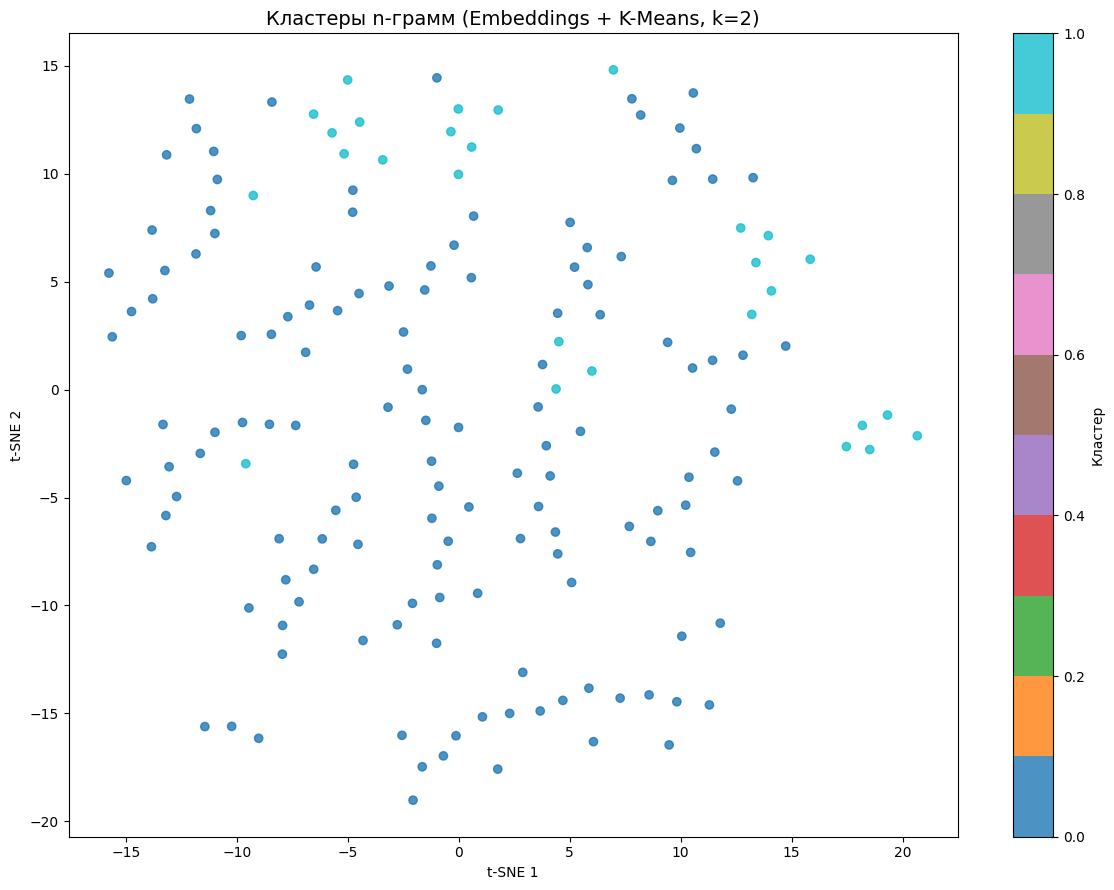


🔍 Примеры n-грамм по кластерам (топ-5):

Кластер 0:
  - relentless
  - pressure
  - heavy
  - body
  - never

Кластер 1:
  - hooks
  - heavy hooks
  - hooks body
  - combinations
  - punches


In [ ]:
if __name__ == "__main__":
    # Пример данных
    data = {
        'text': [
    "Relentless pressure, heavy hooks to the body, never stopped attacking.",
    "Swarming forward with wild combinations, overwhelming the opponent.",
    "Constant aggression, throwing punches in bunches, high output fighter.",

    # Техничный стиль
    "Precise footwork, sharp counters, excellent timing and distance control.",
    "Used feints and angles to set up clean takedowns and strikes.",
    "Displayed superior technique, balance, and tactical awareness.",

    # Оборонительный стиль
    "Excellent head movement, blocked most strikes, stayed out of danger.",
    "Focused on defense, avoided exchanges, waited for opponent's mistakes.",
    "Minimal risk fighting, strong guard, clinched to neutralize aggression."
        ]
    }
    df = pd.DataFrame(data)

    # Запуск кластеризации
    result = cluster_ngrams_with_embeddings(
        df,
        text_column='text',
        language='english',  # или 'russian'
        include_unigrams=True,
        include_bigrams=True,
        include_trigrams=True,
        max_k=8
    )

In [1]:
pip install wordcloud

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
    text = '''Первый раунд Махачев полностью забрал себе. По ходу одного из эпизодов дагестанец и вовсе попытался задушить соперника, но Порье сумел защититься. Затем Махачев взял его корпус в замок ногами и залез за спину. В таком положении бойцы провели около трех минут — до сирены на перерыв.
Во втором раунде Махачев пытался развить успех. Несколько раз он безуспешно пытался провести тейкдаун. Только за 12 секунд до конца раунда ему удалось это сделать. В третьем раунде Махачев успешно провел удар коленом по сопернику, затем подтащил Порье к сетке и затащил вниз, обхватив корпус ногами. Махачев, как и в первом раунде, залез за спину сопернику. И вновь атака дагестанца не закончилась досрочной остановкой боя — Порье сумел отбиться. Более того, он сумел перевести бой в стойку и там выглядел лучше Махачева.
Четвертый раунд российский боец начал с уверенной работы в стойке. Затем Махачев вновь попробовал затянуть противника вниз, но не смог. Порье рассек Махачеву лоб и провел серию ударов по корпусу соперника. Инициатива была уже на стороне американца, который с каждой секундой улучшал свое положение по ходу боя.
Финальный раунд начался с атак Порье, который в ходе одного из эпизодов нанес левый боковой в челюсть, но Махачев выдержал. Более того, россиянин сумел провести тейкдаун: Махачев зацепился за пятку Порье и свалил его на настил октагона, где провел успешный удушающий прием. '''
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

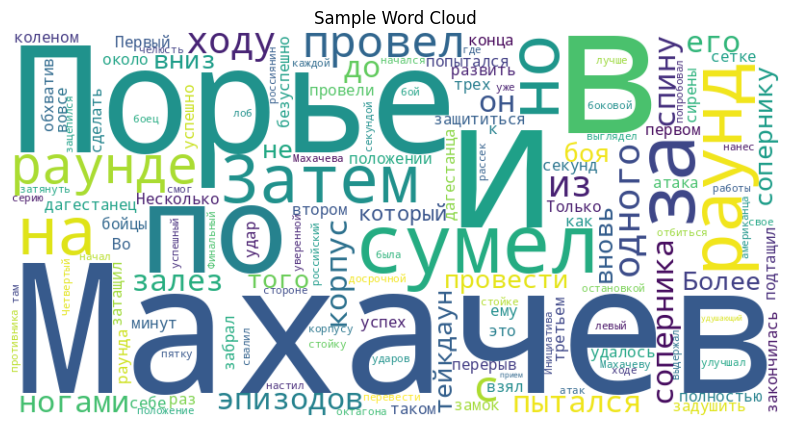

In [7]:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Sample Word Cloud")
    plt.show()

In [17]:
stopw = ['а', 'Порье', 'Махачев'] #массив слов, которые хотим удалить
#подадим массив stopw в WordCloud как параметр stopwords
wordCloud = WordCloud(width = 1000, height = 1000, random_state=1,
                      background_color='blue', colormap='Set1',
                      collocations=False, stopwords=stopw, max_words=15).generate(text)

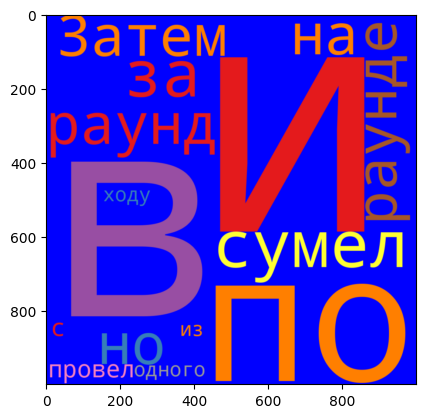

In [18]:
plt.imshow(wordCloud, interpolation='bilinear')

In [42]:
stopw = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/refs/heads/main/%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0%20Python%20%D0%B4%D0%BB%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BD%D0%B0%D1%83%D1%87%D0%BD%D1%8B%D1%85%20%D0%B8%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B9%20%D0%B2%20%D0%B5%D0%B4%D0%B8%D0%BD%D0%BE%D0%B1%D0%BE%D1%80%D1%81%D1%82%D0%B2%D0%B0%D1%85/stop-ru.txt')
stopw = stopw['а'].tolist()
wordCloud = WordCloud(width = 1000, height = 1000, random_state=1,
                      background_color='white',
                      collocations=False, stopwords=stopw, max_words=25).generate(text)

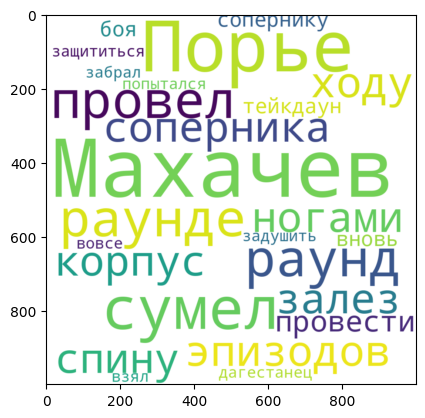

In [43]:
plt.imshow(wordCloud, interpolation='bilinear')